In [1]:
import os
import numpy as np
import torch
from torch import Tensor
from torch.nn.parameter import Parameter
from torch.autograd import Variable
import torch.nn.functional as F
from lib.dataset_custom import KernDataset,DatasetSplit
from lib.model import ScoreModel
from lib.opt import optimize
from lib.CrossValidation import CrossValidator
from lib.config import corpora_for_classification_all_composers as default_corpora
import lib.media as media

In [2]:
os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID'   # see issue #152
os.environ['CUDA_VISIBLE_DEVICES']='3'
#os.environ['CUDA_LAUNCH_BLOCKING']='1'

checkpoint_dir = '_histogram_100'
context = 100
corpora = tuple(default_corpora)

In [3]:
import sys
class Convnet(ScoreModel):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    
    def define_graph(self, debug=False):      
        self.w_e = Parameter(Tensor(78, self.composers))
        self.w_t = Parameter(Tensor(55, self.composers))
        self.w = 
        self.bias = Parameter(Tensor(self.composers))
    
    def forward(self, x):
        e,t,_,_ = x
        x_e = e.mean(1).mean(1).mean(1) 
        x_t = t.mean(1).mean(1).mean(1)
        
        return torch.mm(x_e, self.w_e) + torch.mm(x_t, self.w_t) + self.bias[None, :].expand(e.shape[0], -1)

In [4]:
validator = CrossValidator(Convnet, corpora, is_patches_model=True, patience=50, batch_size=64)

---------------------------------------------
---------------------------------------------
Fold 0
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 19]) (1482)
w_t torch.Size([55, 19]) (1045)
bias torch.Size([19]) (19)
Initialized graph with 2546 parameters
Initiating optimizer, 32 iterations/epoch.
acc_tr	acc_ts	iter	loss_tr	loss_ts	time	utime
0.00    0.42    0       4.25    4.25    2.12    1.47    
31.50   33.05   32      4.03    3.95    3.63    1.44    
31.50   33.47   64      3.67    3.67    3.84    1.45    
31.50   33.05   96      3.65    3.52    3.65    1.54    
31.50   34.73   128     3.49    3.40    3.45    1.36    
32.00   33.89   160     3.30    3.31    3.82    1.52    
33.00   34.73   192     3.28    3.22    3.66    1.46    
35.00   36.40   224     3.19    3.14    3.84    1.40    
35.00   38.08   256     3.1

64.00   64.85   4320    1.62    1.62    3.67    1.57    
63.50   63.18   4352    1.53    1.62    3.81    1.41    
63.50   64.44   4384    1.49    1.61    3.72    1.41    
63.50   64.02   4416    1.43    1.61    3.77    1.49    
63.50   63.60   4448    1.63    1.61    3.89    1.50    
64.50   64.44   4480    1.51    1.60    3.74    1.42    
63.50   64.02   4512    1.36    1.60    3.82    1.61    
65.00   64.02   4544    1.61    1.60    3.54    1.41    
63.50   64.02   4576    1.40    1.60    3.82    1.45    
63.50   64.44   4608    1.52    1.60    3.88    1.50    
64.50   64.02   4640    1.55    1.59    3.80    1.57    
64.50   63.60   4672    1.39    1.59    3.57    1.50    
64.50   64.02   4704    1.50    1.59    3.76    1.37    
64.50   64.02   4736    1.50    1.59    3.68    1.51    
65.50   64.02   4768    1.51    1.59    3.71    1.48    
64.00   64.02   4800    1.43    1.58    3.72    1.55    
64.00   63.60   4832    1.42    1.58    3.63    1.29    
64.50   63.60   4864    1.61   

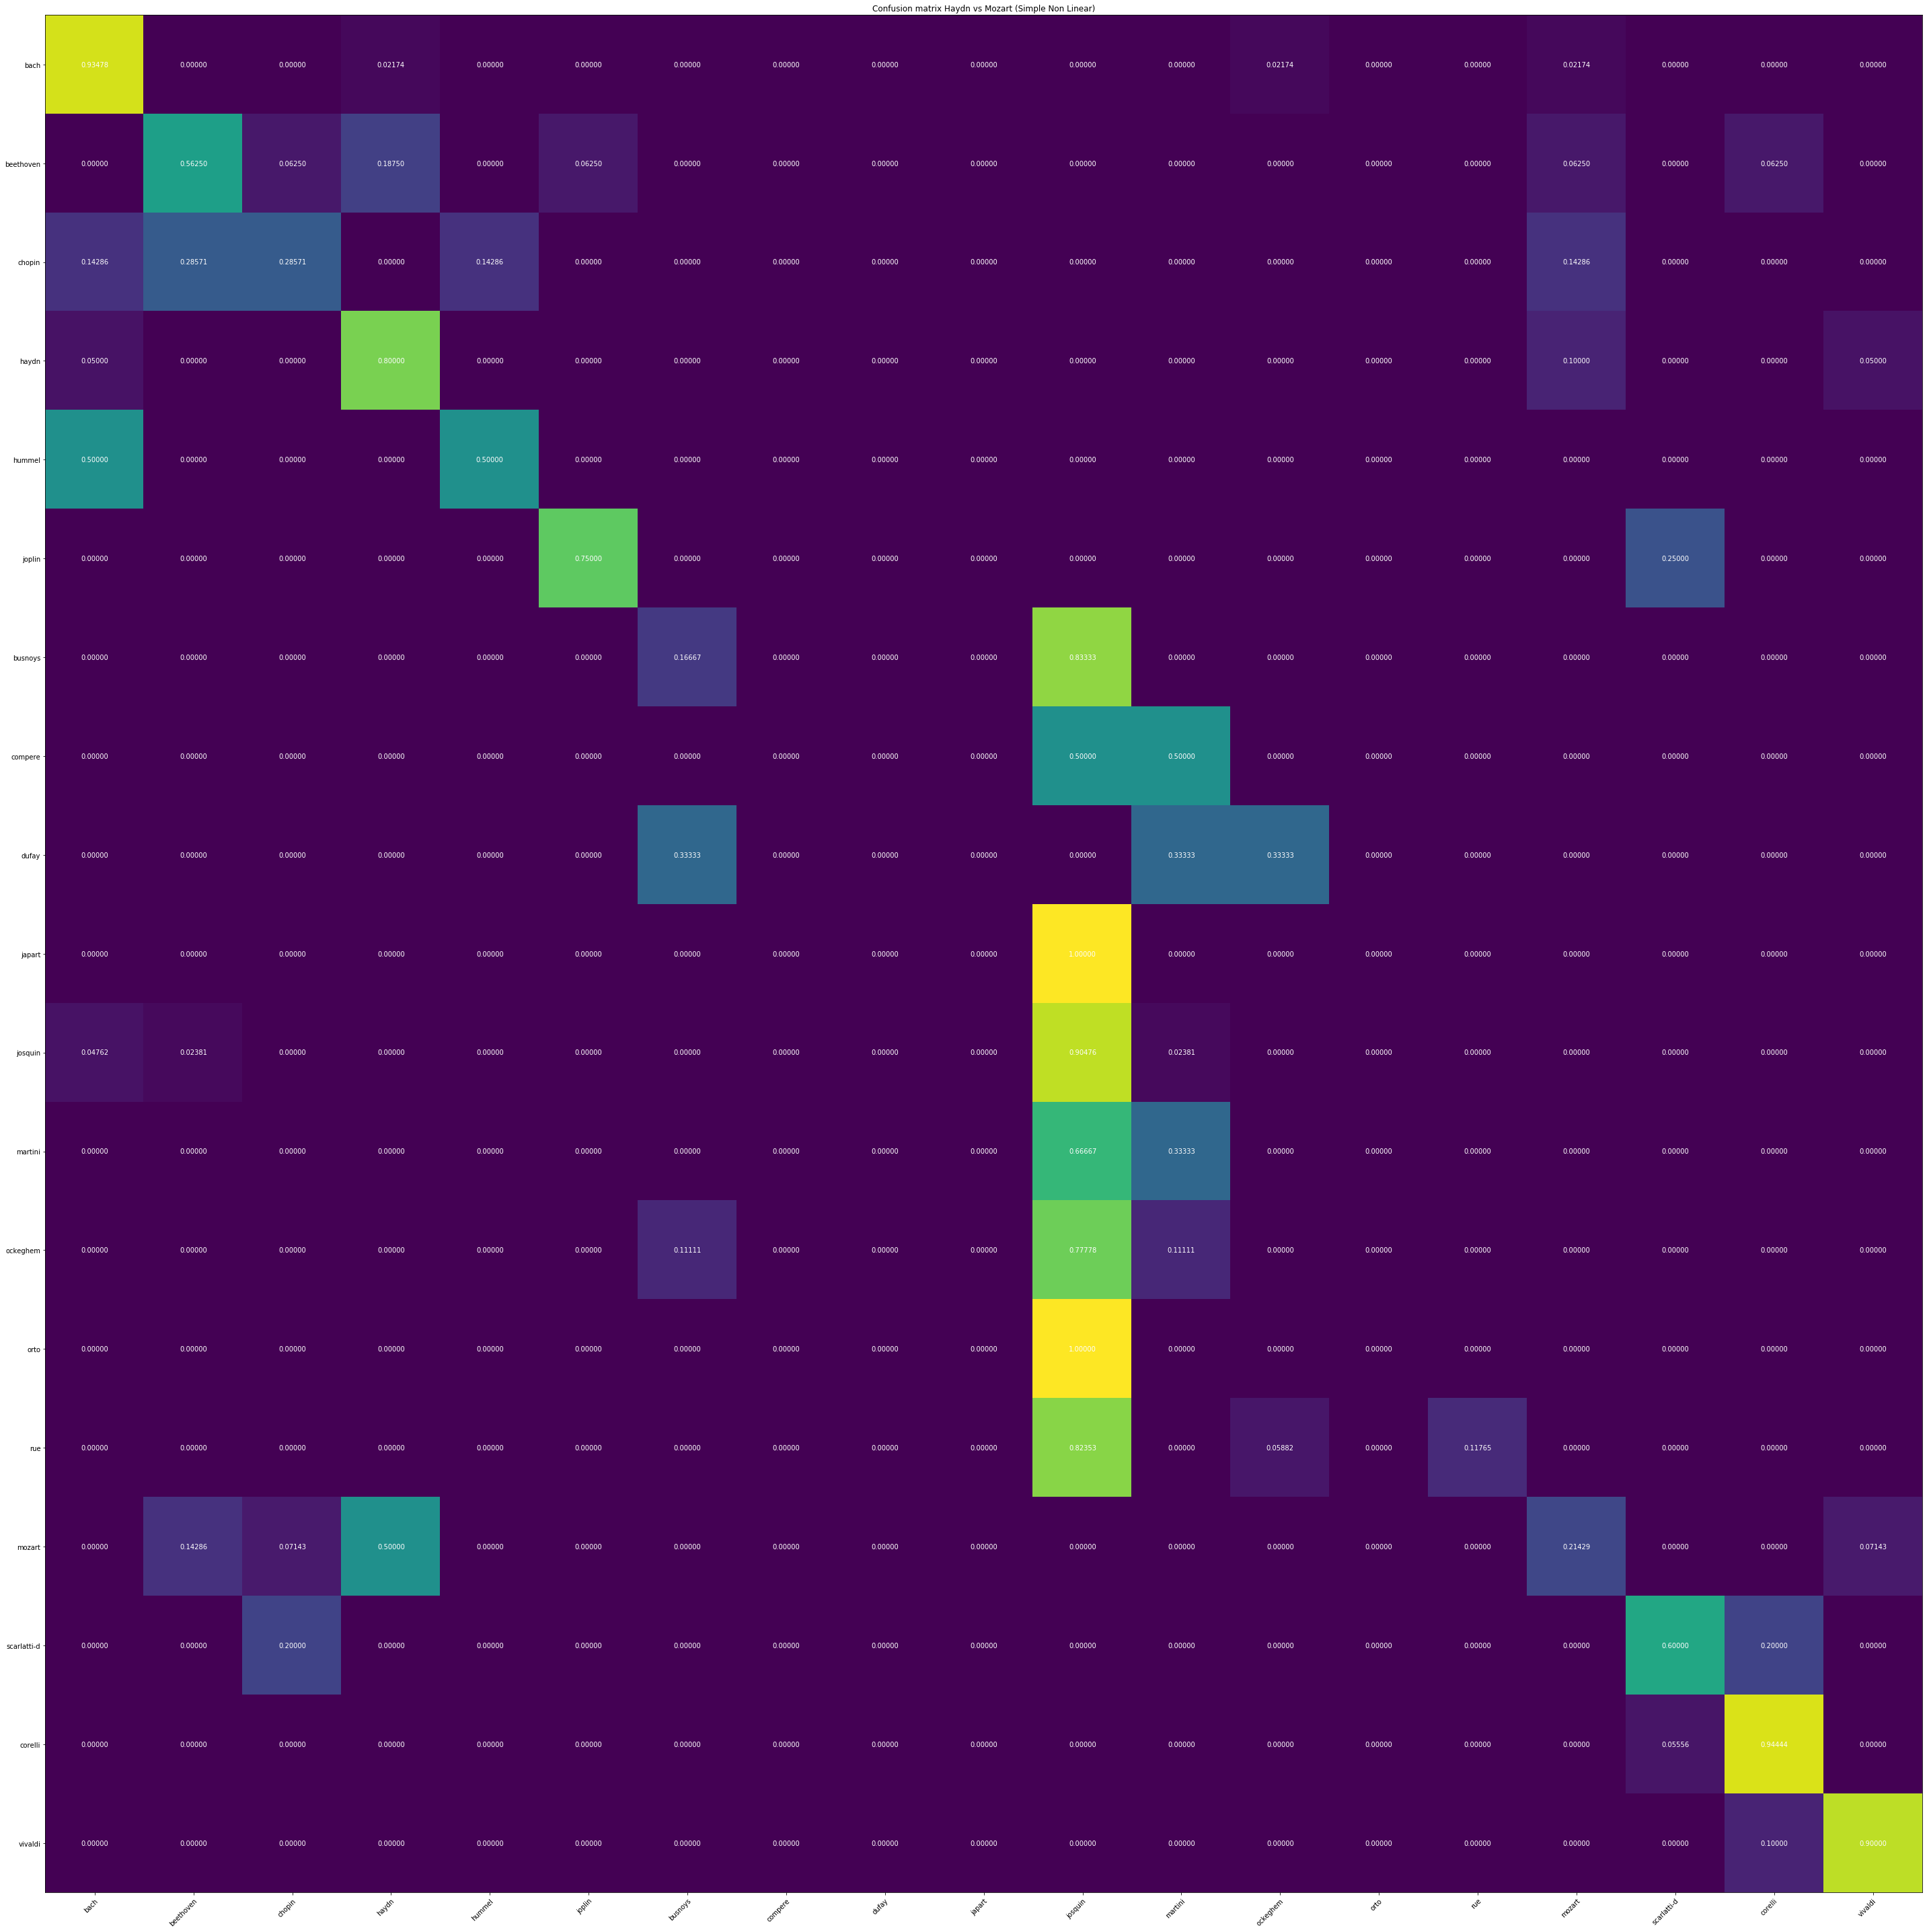

bach 43 / 46 = 0.9347826086956522
beethoven 9 / 16 = 0.5625
busnoys 1 / 6 = 0.16666666666666666
chopin 2 / 7 = 0.2857142857142857
compere 0 / 2 = 0.0
corelli 17 / 18 = 0.9444444444444444
dufay 0 / 3 = 0.0
haydn 16 / 20 = 0.8
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 3 / 4 = 0.75
josquin 38 / 42 = 0.9047619047619048
martini 4 / 12 = 0.3333333333333333
mozart 3 / 14 = 0.21428571428571427
ockeghem 0 / 9 = 0.0
orto 0 / 4 = 0.0
rue 2 / 17 = 0.11764705882352941
scarlatti-d 3 / 5 = 0.6
vivaldi 9 / 10 = 0.9
151 239 0.6317991631799164
---------------------------------------------
---------------------------------------------
Fold 1
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 19]) (1482)
w_t torch.Size([55, 19]) (1045)
bias torch.Size([19]) (19)
Initialized graph with 2546 parameters
Initiating optimizer, 32 iterations/e

64.00   61.09   4032    1.51    1.80    4.11    1.62    
63.50   61.09   4064    1.72    1.80    4.05    1.74    
63.50   61.51   4096    1.74    1.80    4.12    1.67    
64.00   61.09   4128    1.65    1.80    4.25    1.74    
64.00   61.09   4160    1.57    1.80    4.08    1.63    
64.00   60.67   4192    1.65    1.79    4.25    1.82    
63.50   61.09   4224    1.68    1.79    4.02    1.64    
63.00   61.92   4256    1.75    1.79    4.16    1.71    
64.00   61.92   4288    1.72    1.79    4.13    1.87    
63.50   60.67   4320    1.61    1.79    4.09    1.77    
63.50   61.51   4352    1.55    1.78    4.33    1.76    
63.50   62.34   4384    1.54    1.78    4.29    1.77    
64.00   61.09   4416    1.53    1.78    4.23    1.73    
63.00   61.92   4448    1.94    1.78    4.15    1.72    
63.00   60.67   4480    1.74    1.78    4.45    1.82    
64.00   61.09   4512    1.66    1.77    4.24    1.68    
63.00   61.92   4544    1.55    1.77    4.23    1.68    
63.00   61.51   4576    1.61   

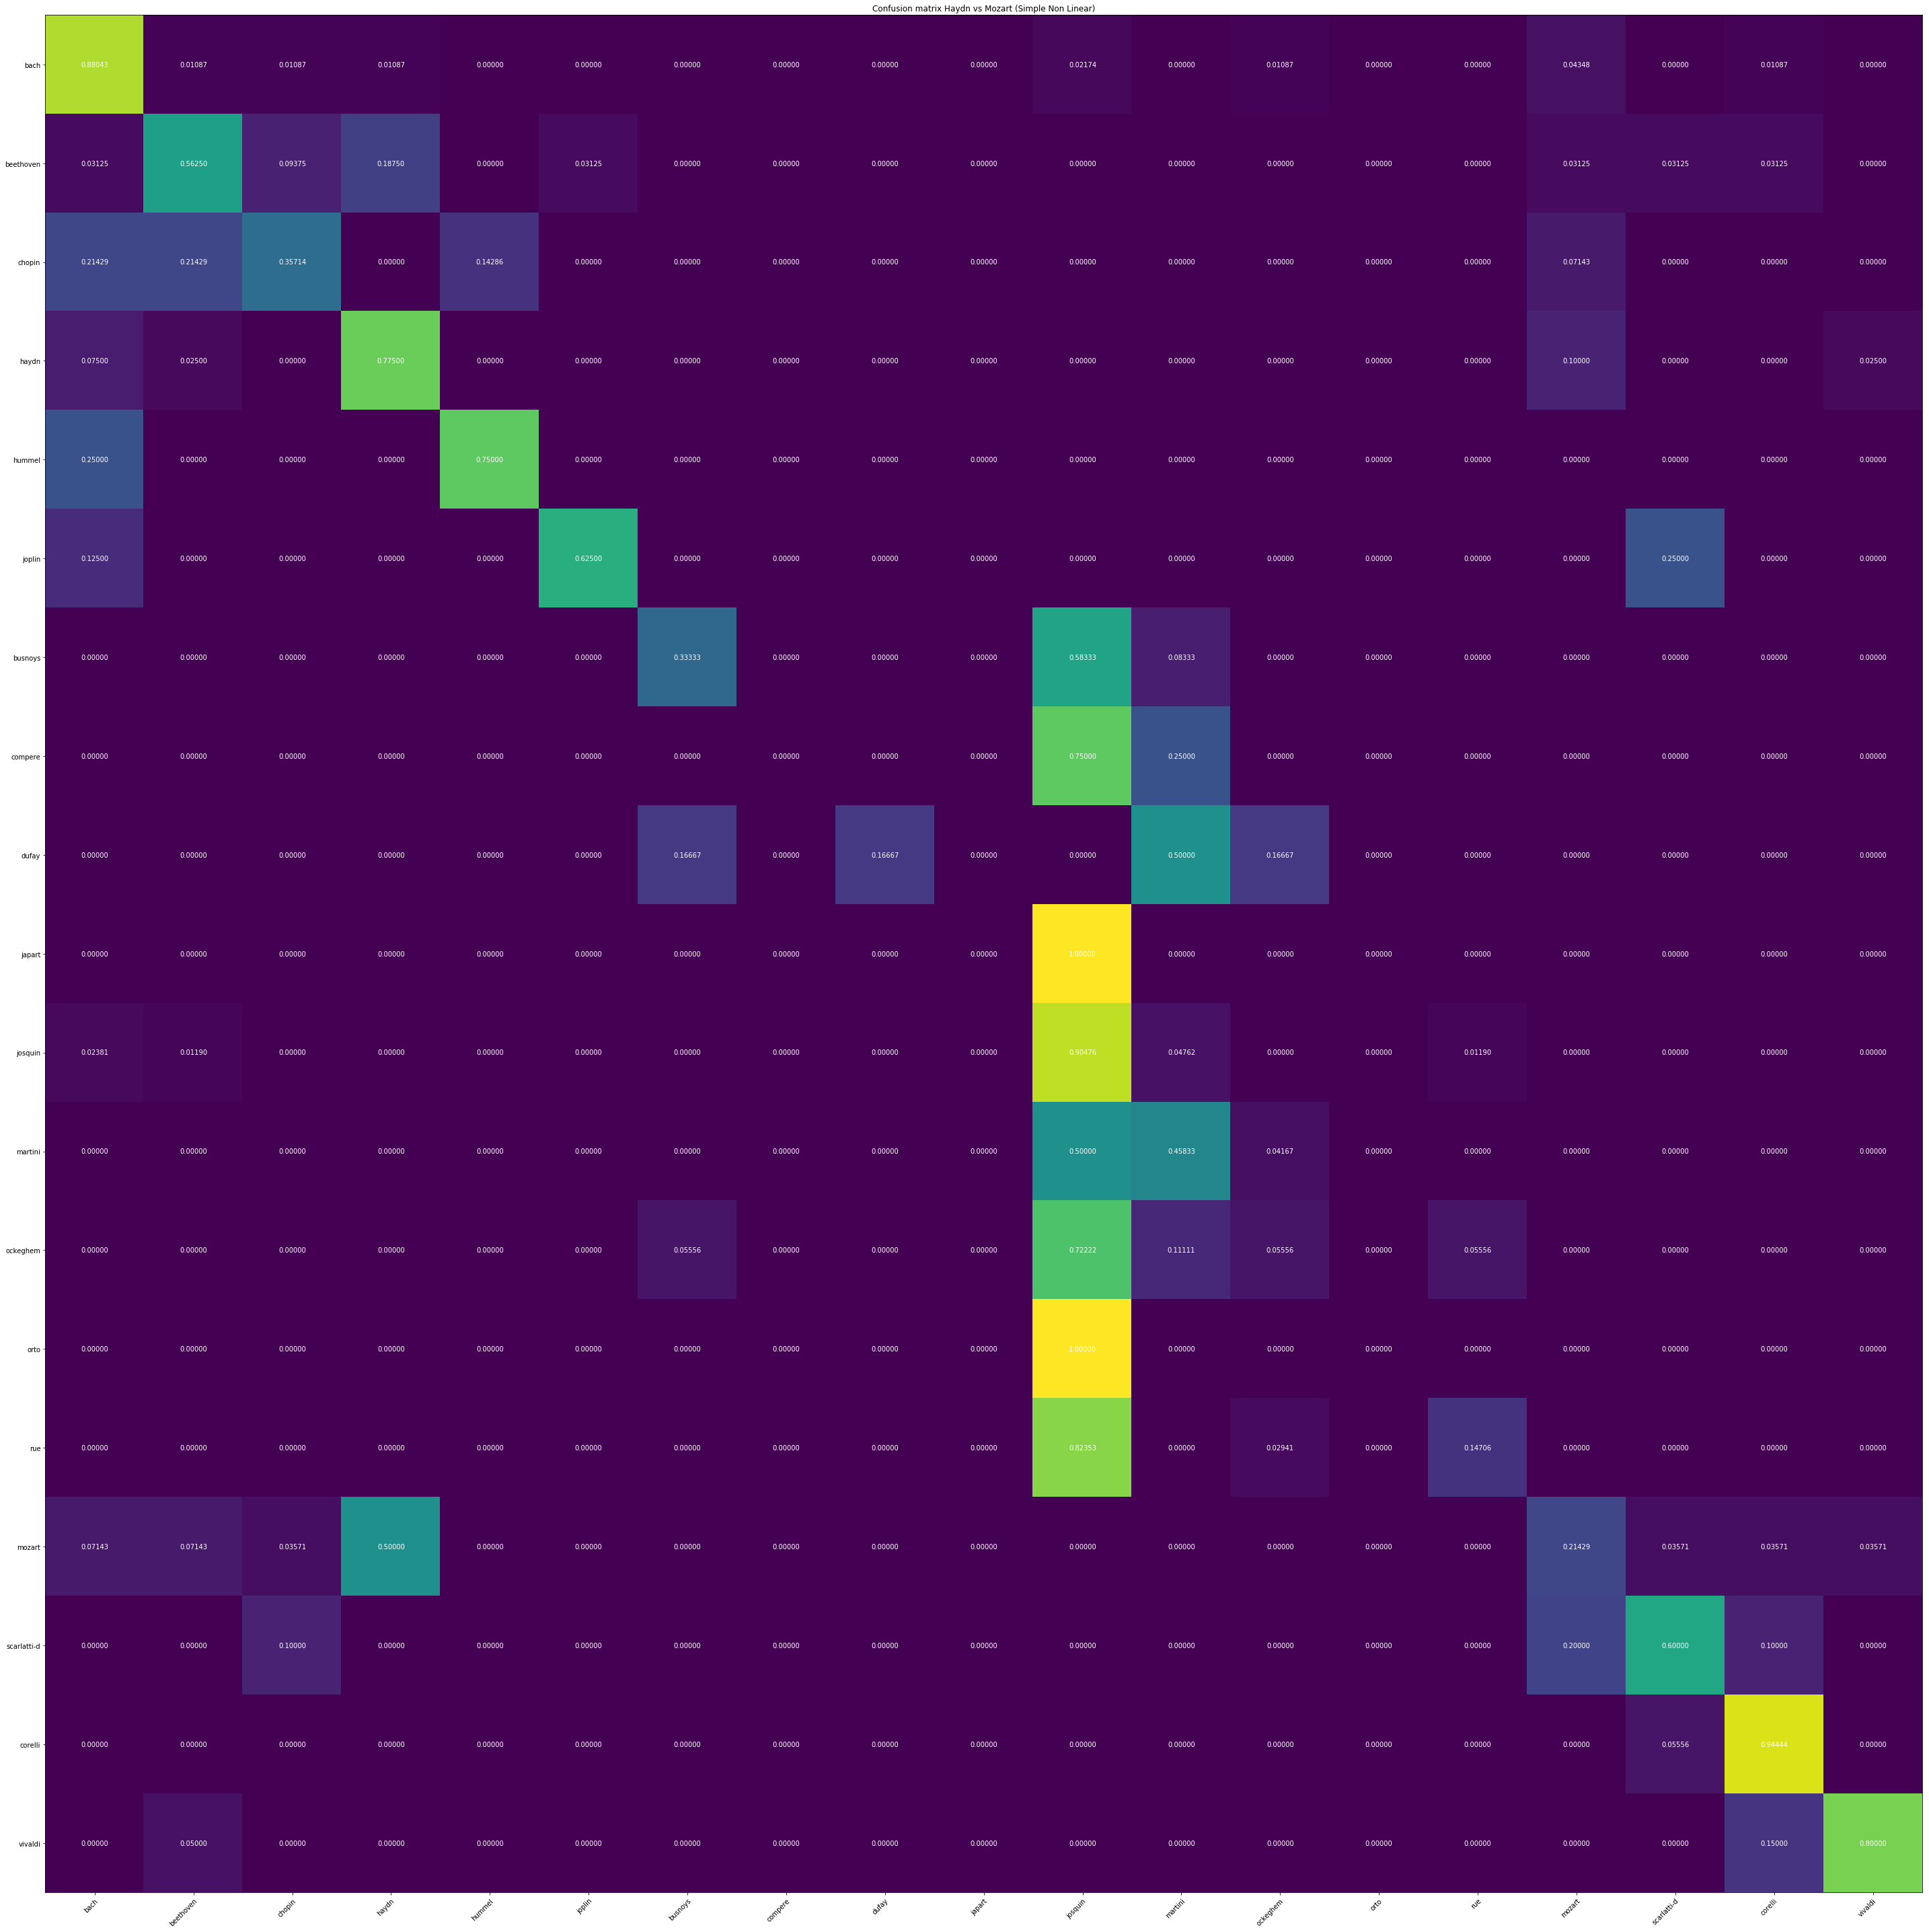

bach 38 / 46 = 0.8260869565217391
beethoven 9 / 16 = 0.5625
busnoys 3 / 6 = 0.5
chopin 3 / 7 = 0.42857142857142855
compere 0 / 2 = 0.0
corelli 17 / 18 = 0.9444444444444444
dufay 1 / 3 = 0.3333333333333333
haydn 15 / 20 = 0.75
hummel 2 / 2 = 1.0
japart 0 / 2 = 0.0
joplin 2 / 4 = 0.5
josquin 38 / 42 = 0.9047619047619048
martini 7 / 12 = 0.5833333333333334
mozart 3 / 14 = 0.21428571428571427
ockeghem 1 / 9 = 0.1111111111111111
orto 0 / 4 = 0.0
rue 3 / 17 = 0.17647058823529413
scarlatti-d 3 / 5 = 0.6
vivaldi 7 / 10 = 0.7
152 239 0.6359832635983264
---------------------------------------------
---------------------------------------------
Fold 2
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 19]) (1482)
w_t torch.Size([55, 19]) (1045)
bias torch.Size([19]) (19)
Initialized graph with 2546 parameters
Initiating optimizer, 

62.50   63.60   4032    1.55    1.61    4.28    1.65    
62.50   63.18   4064    1.62    1.61    4.35    1.76    
62.50   63.60   4096    1.75    1.61    4.13    1.63    
63.00   63.60   4128    1.47    1.60    4.34    1.75    
63.50   63.60   4160    1.62    1.60    4.42    1.83    
62.50   64.02   4192    1.58    1.60    3.89    1.58    
62.50   63.60   4224    1.69    1.60    4.37    1.93    
62.00   64.44   4256    1.69    1.59    3.97    1.64    
64.00   64.02   4288    1.43    1.60    3.85    1.61    
63.50   64.44   4320    1.47    1.59    4.42    1.89    
62.50   64.02   4352    1.62    1.59    4.21    1.58    
64.00   64.44   4384    1.53    1.59    4.23    1.77    
63.00   65.27   4416    1.63    1.59    4.09    1.62    
63.50   65.27   4448    1.74    1.58    4.14    1.71    
63.00   64.44   4480    1.70    1.58    4.18    1.86    
63.00   64.44   4512    1.52    1.58    4.14    1.66    
62.50   64.85   4544    1.60    1.58    4.25    1.88    
63.50   64.44   4576    1.70   

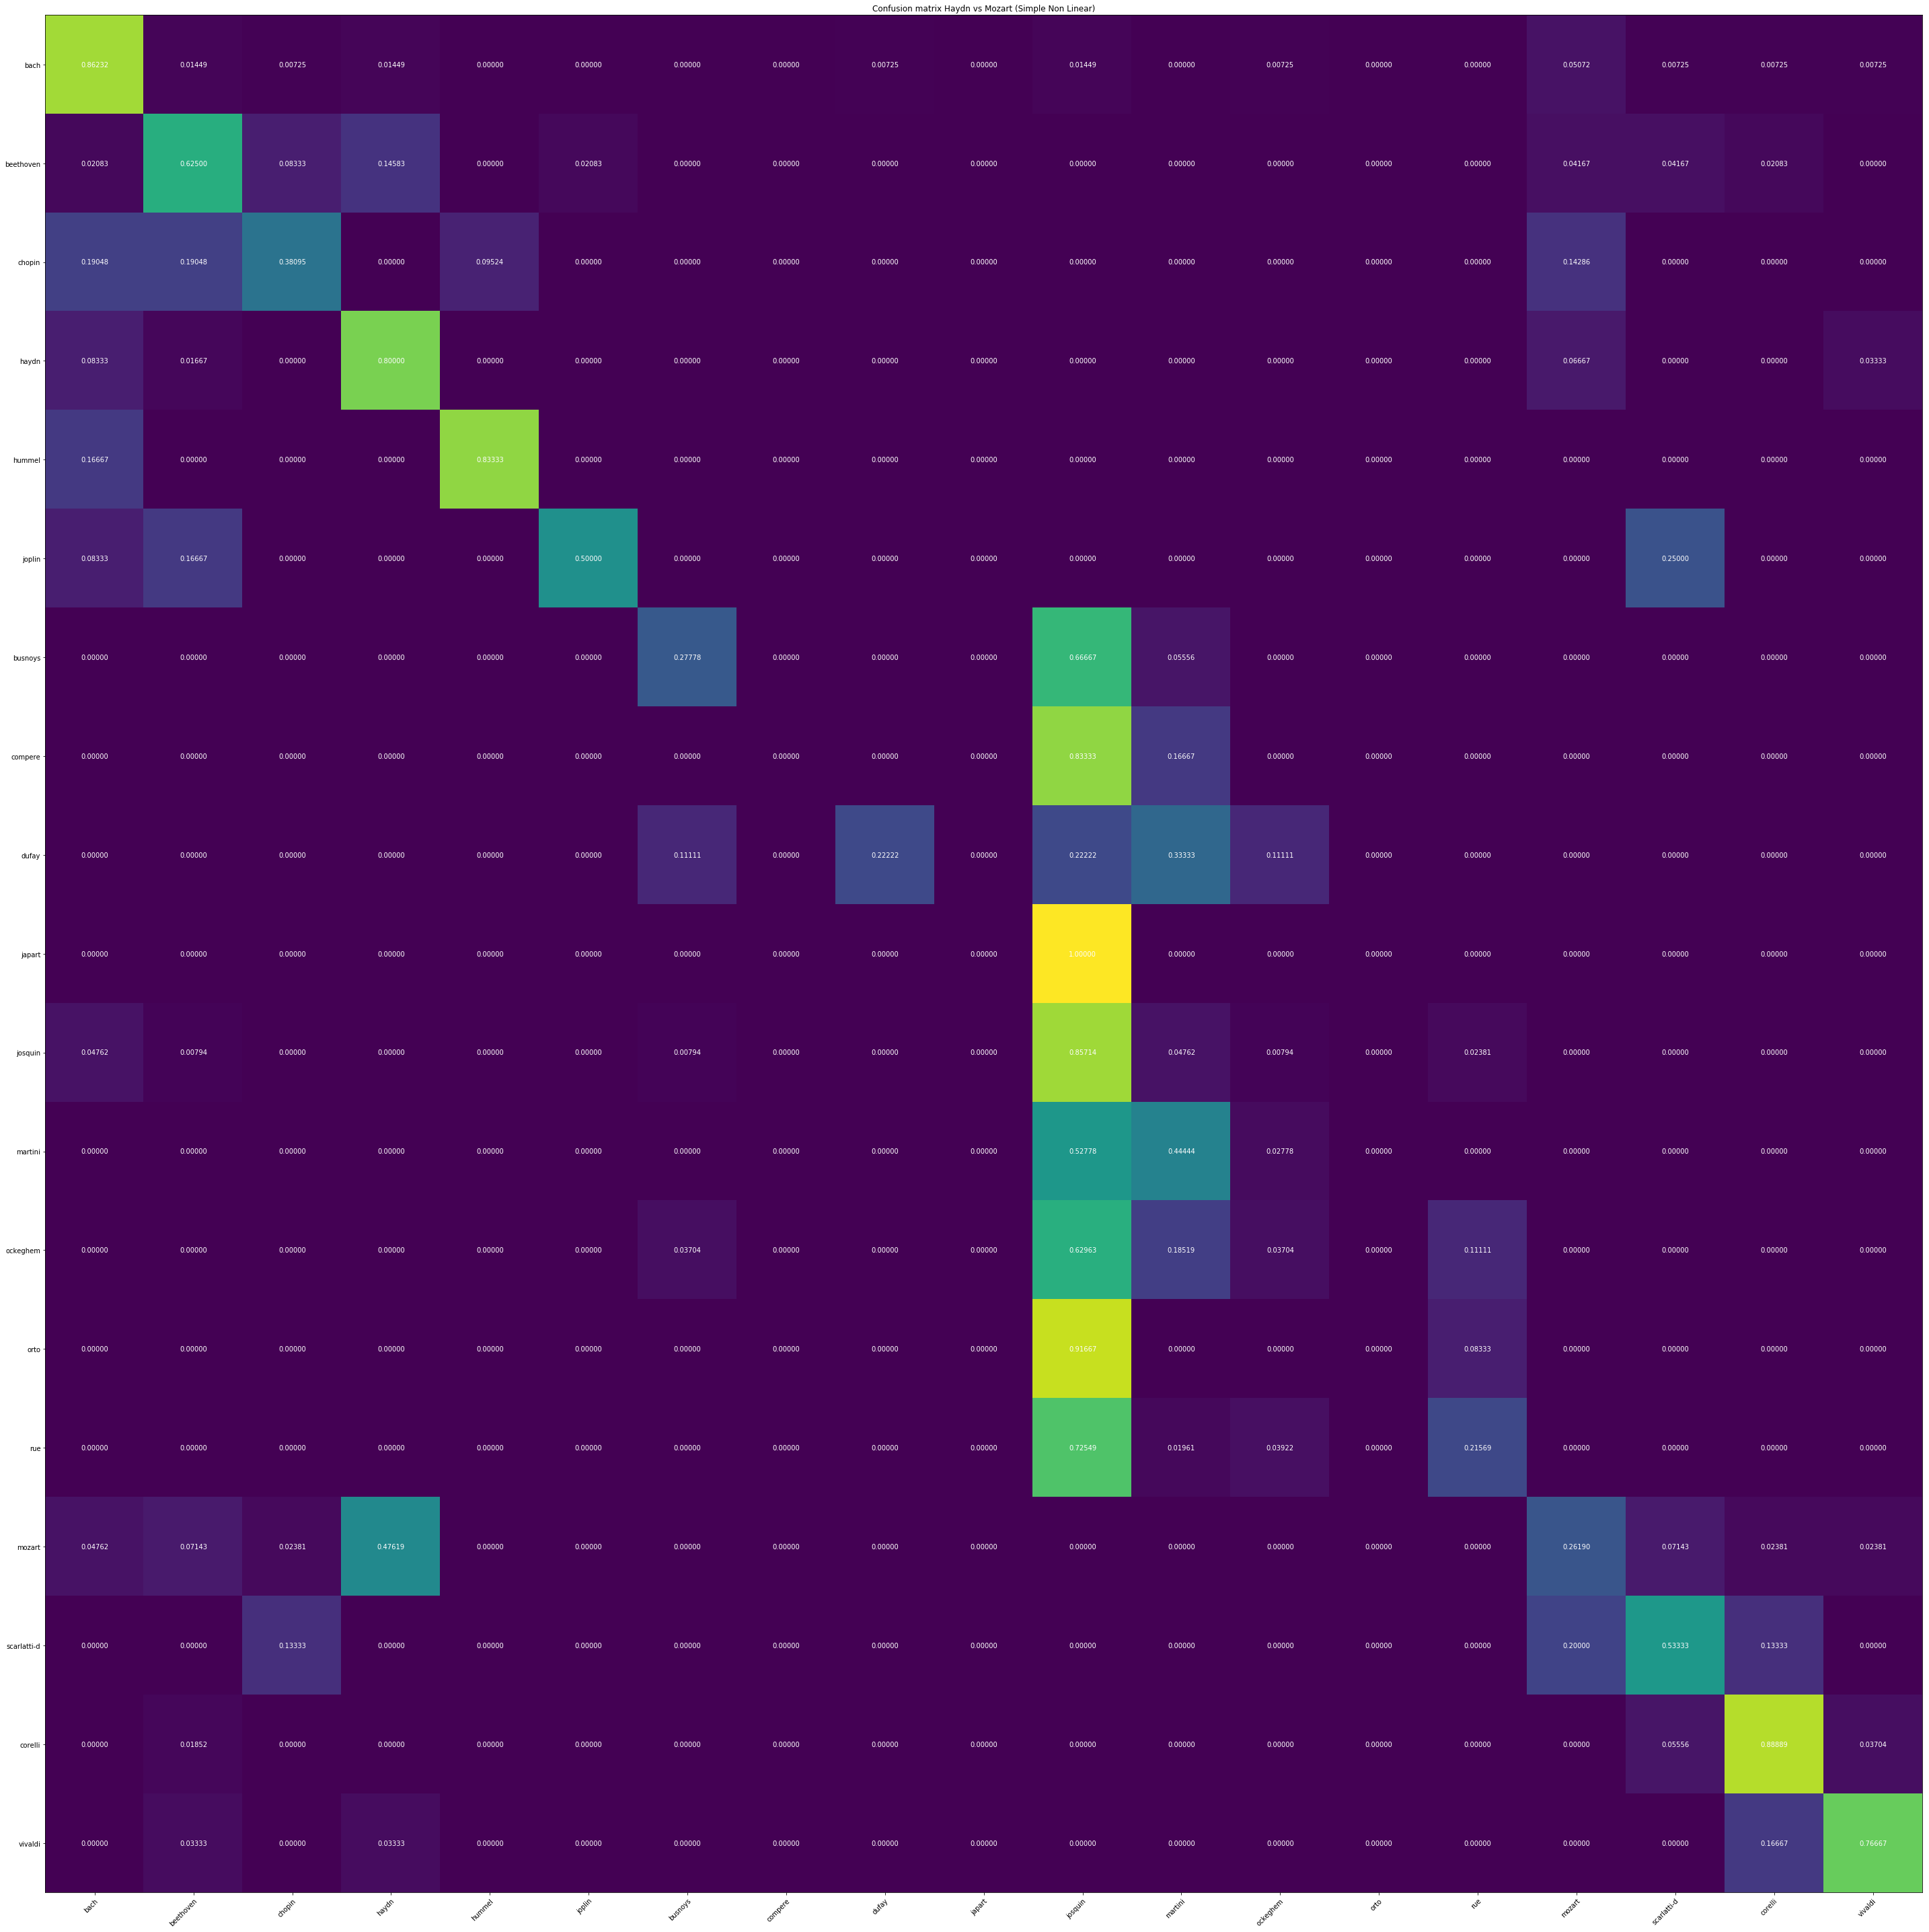

bach 38 / 46 = 0.8260869565217391
beethoven 12 / 16 = 0.75
busnoys 1 / 6 = 0.16666666666666666
chopin 3 / 7 = 0.42857142857142855
compere 0 / 2 = 0.0
corelli 14 / 18 = 0.7777777777777778
dufay 1 / 3 = 0.3333333333333333
haydn 17 / 20 = 0.85
hummel 2 / 2 = 1.0
japart 0 / 2 = 0.0
joplin 1 / 4 = 0.25
josquin 32 / 42 = 0.7619047619047619
martini 5 / 12 = 0.4166666666666667
mozart 5 / 14 = 0.35714285714285715
ockeghem 0 / 9 = 0.0
orto 0 / 4 = 0.0
rue 6 / 17 = 0.35294117647058826
scarlatti-d 2 / 5 = 0.4
vivaldi 7 / 10 = 0.7
146 239 0.6108786610878661
---------------------------------------------
---------------------------------------------
Fold 3
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 19]) (1482)
w_t torch.Size([55, 19]) (1045)
bias torch.Size([19]) (19)
Initialized graph with 2546 parameters
Initiating optimizer,

65.00   63.18   4000    1.62    1.73    4.18    1.58    
65.00   62.34   4032    1.51    1.73    4.60    1.85    
65.00   62.34   4064    1.54    1.73    4.37    1.65    
65.00   62.76   4096    1.59    1.73    4.26    1.76    
66.50   63.60   4128    1.64    1.73    3.89    1.68    
66.50   63.60   4160    1.73    1.72    4.17    1.59    
65.00   62.76   4192    1.66    1.72    4.08    1.67    
65.50   64.02   4224    1.54    1.72    3.88    1.68    
65.00   63.18   4256    1.59    1.72    3.87    1.56    
66.00   64.02   4288    1.54    1.72    3.93    1.60    
66.50   63.18   4320    1.61    1.71    4.45    2.05    
66.50   64.44   4352    1.50    1.71    4.15    1.64    
65.50   63.18   4384    1.63    1.71    3.98    1.54    
67.00   64.44   4416    1.45    1.71    4.22    1.65    
66.50   64.44   4448    1.46    1.71    4.01    1.81    
66.50   64.44   4480    1.46    1.71    3.91    1.75    
66.50   64.44   4512    1.62    1.70    4.18    1.81    
67.00   63.18   4544    1.42   

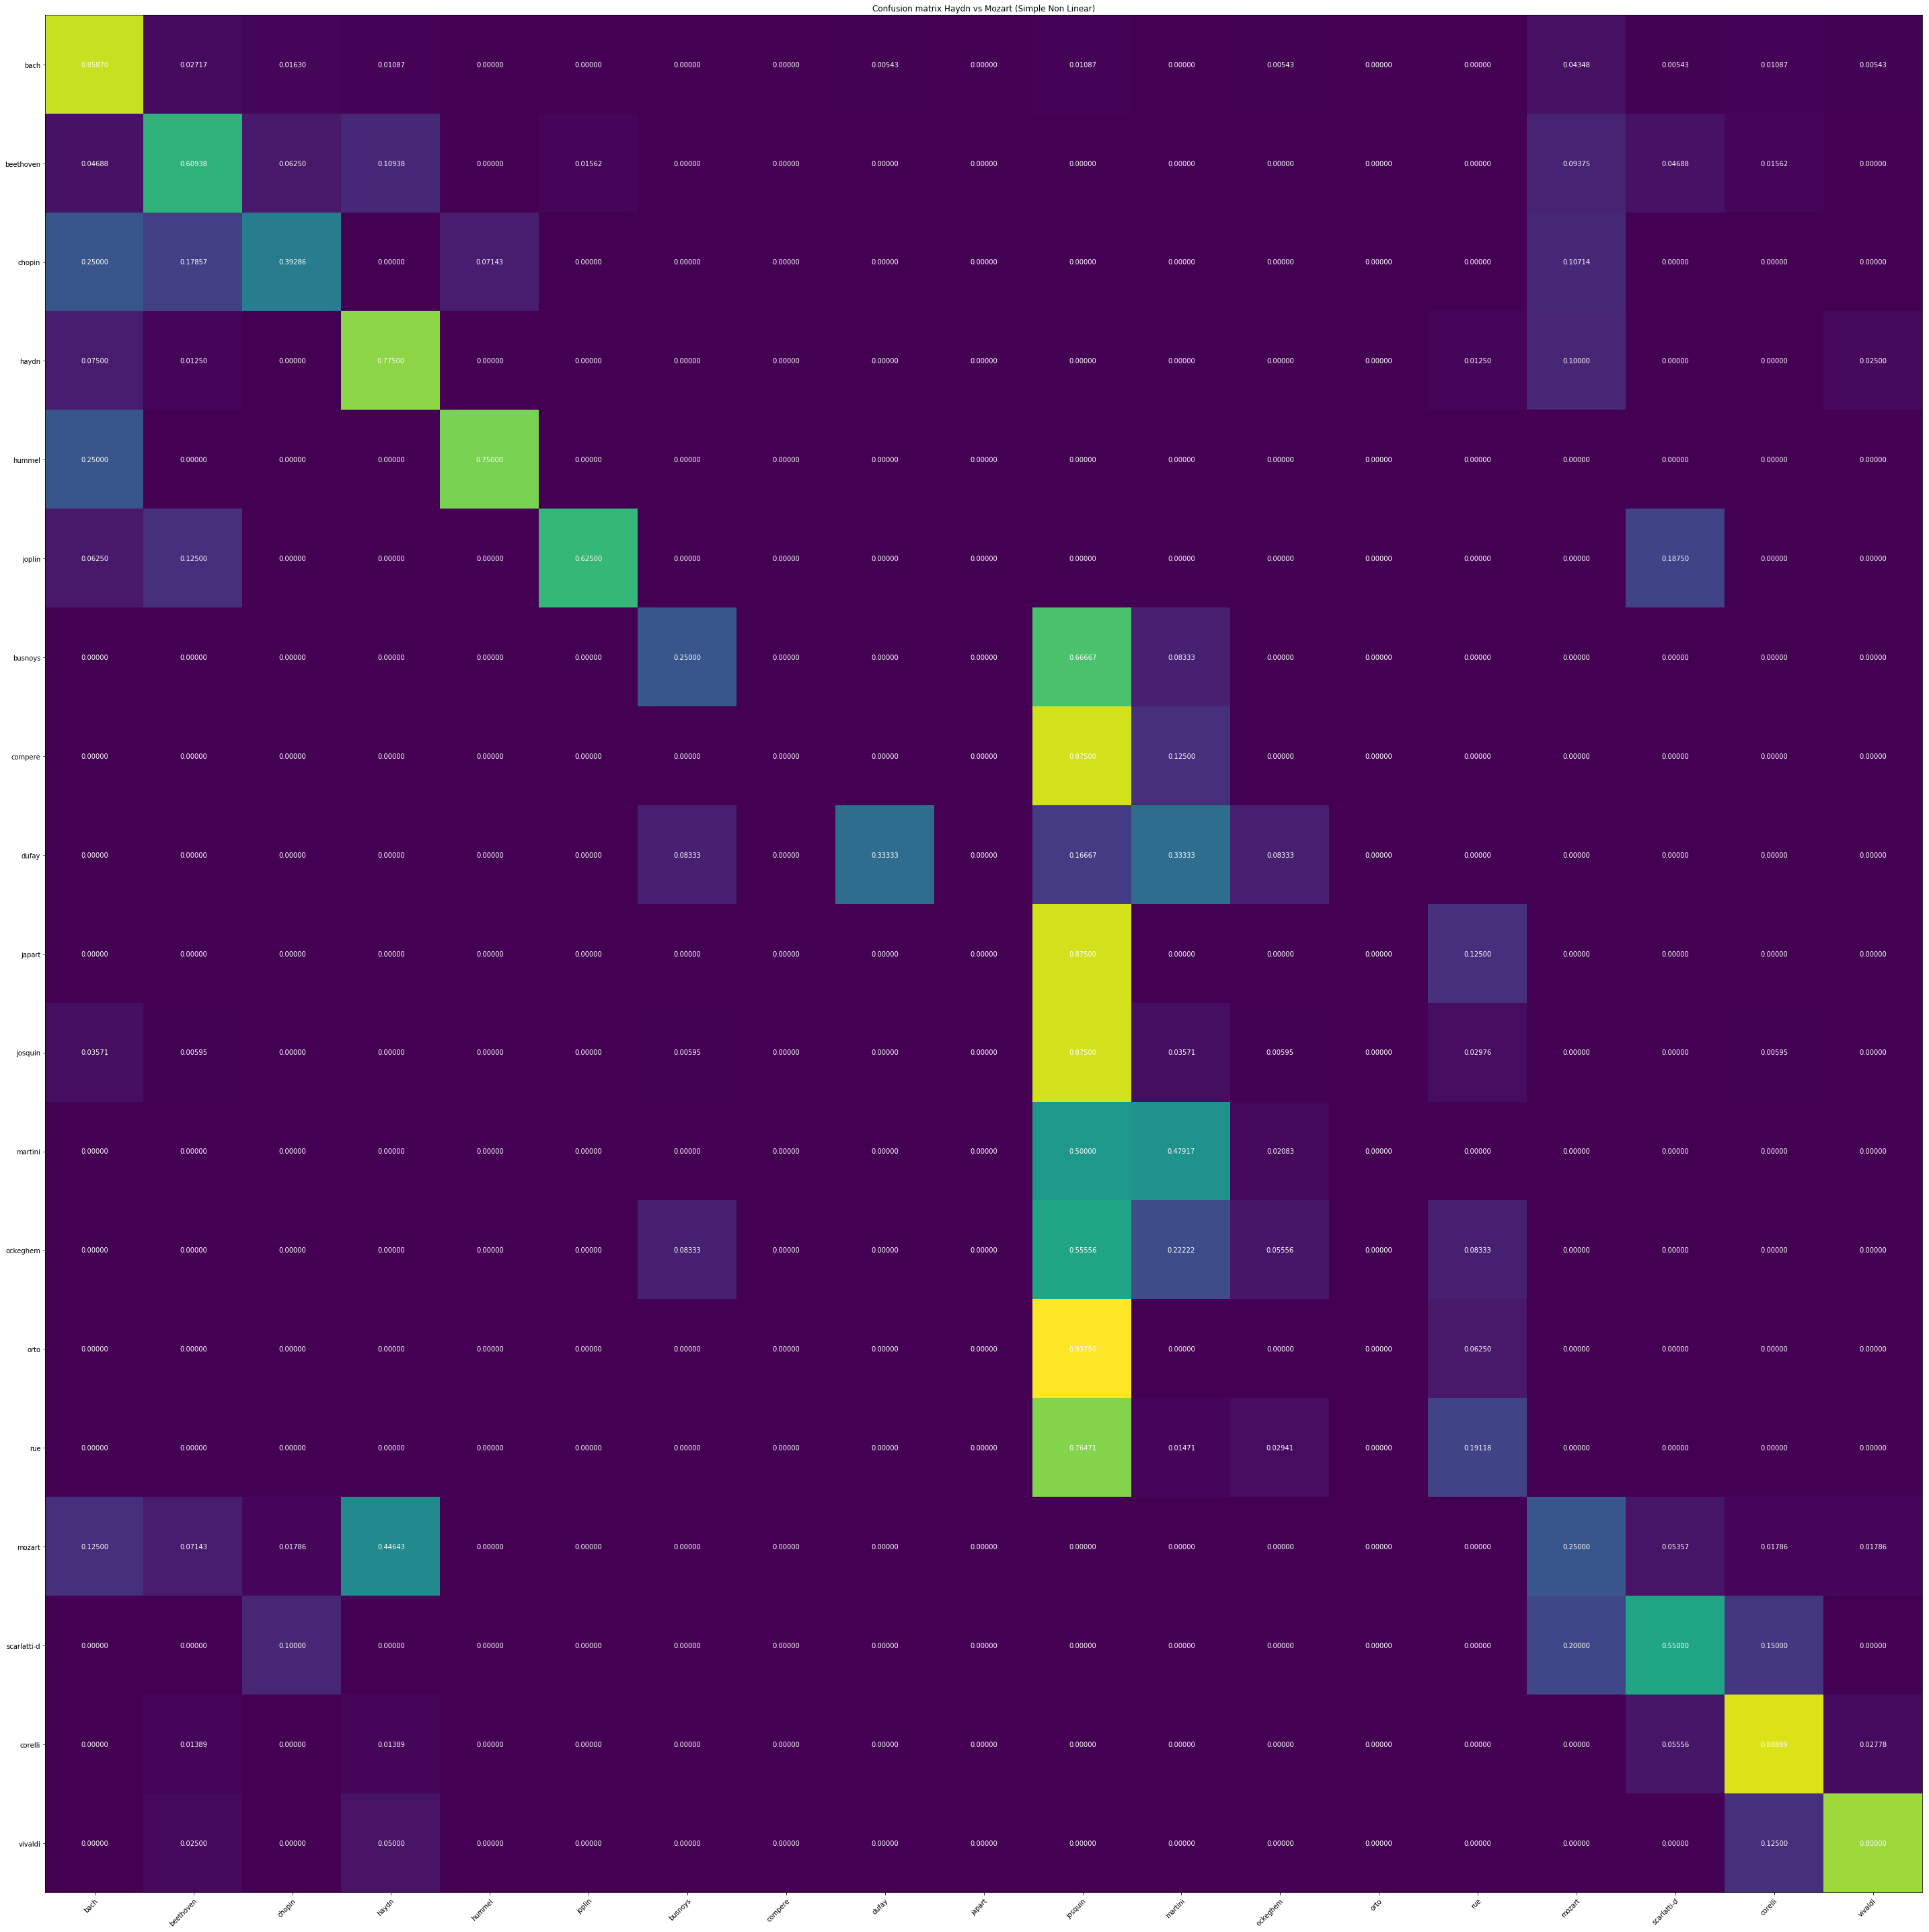

bach 39 / 46 = 0.8478260869565217
beethoven 9 / 16 = 0.5625
busnoys 1 / 6 = 0.16666666666666666
chopin 3 / 7 = 0.42857142857142855
compere 0 / 2 = 0.0
corelli 16 / 18 = 0.8888888888888888
dufay 2 / 3 = 0.6666666666666666
haydn 14 / 20 = 0.7
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 39 / 42 = 0.9285714285714286
martini 7 / 12 = 0.5833333333333334
mozart 3 / 14 = 0.21428571428571427
ockeghem 1 / 9 = 0.1111111111111111
orto 0 / 4 = 0.0
rue 2 / 17 = 0.11764705882352941
scarlatti-d 3 / 5 = 0.6
vivaldi 9 / 10 = 0.9
153 239 0.6401673640167364
---------------------------------------------
---------------------------------------------
Fold 4
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 19]) (1482)
w_t torch.Size([55, 19]) (1045)
bias torch.Size([19]) (19)
Initialized graph with 2546 parameters
Initiat

65.00   61.92   4000    1.65    1.74    4.12    1.76    
65.00   62.76   4032    1.73    1.73    4.31    1.85    
65.00   62.76   4064    1.74    1.73    4.30    1.85    
65.00   63.18   4096    1.88    1.73    4.07    1.71    
64.50   63.18   4128    1.59    1.73    4.41    1.89    
64.50   62.76   4160    1.51    1.72    4.33    1.74    
65.00   62.34   4192    1.56    1.72    4.46    1.71    
64.00   63.18   4224    1.44    1.72    3.75    1.48    
65.50   62.34   4256    1.59    1.72    3.51    1.54    
65.00   63.18   4288    1.68    1.72    3.74    1.58    
64.50   63.60   4320    1.59    1.71    3.61    1.43    
64.50   63.18   4352    1.56    1.71    3.73    1.58    
65.00   64.02   4384    1.68    1.71    3.68    1.52    
64.50   64.02   4416    1.60    1.70    3.55    1.49    
65.50   63.18   4448    1.59    1.71    3.68    1.54    
64.50   63.18   4480    1.58    1.70    3.70    1.46    
65.50   63.18   4512    1.63    1.70    3.71    1.59    
65.00   64.02   4544    1.46   

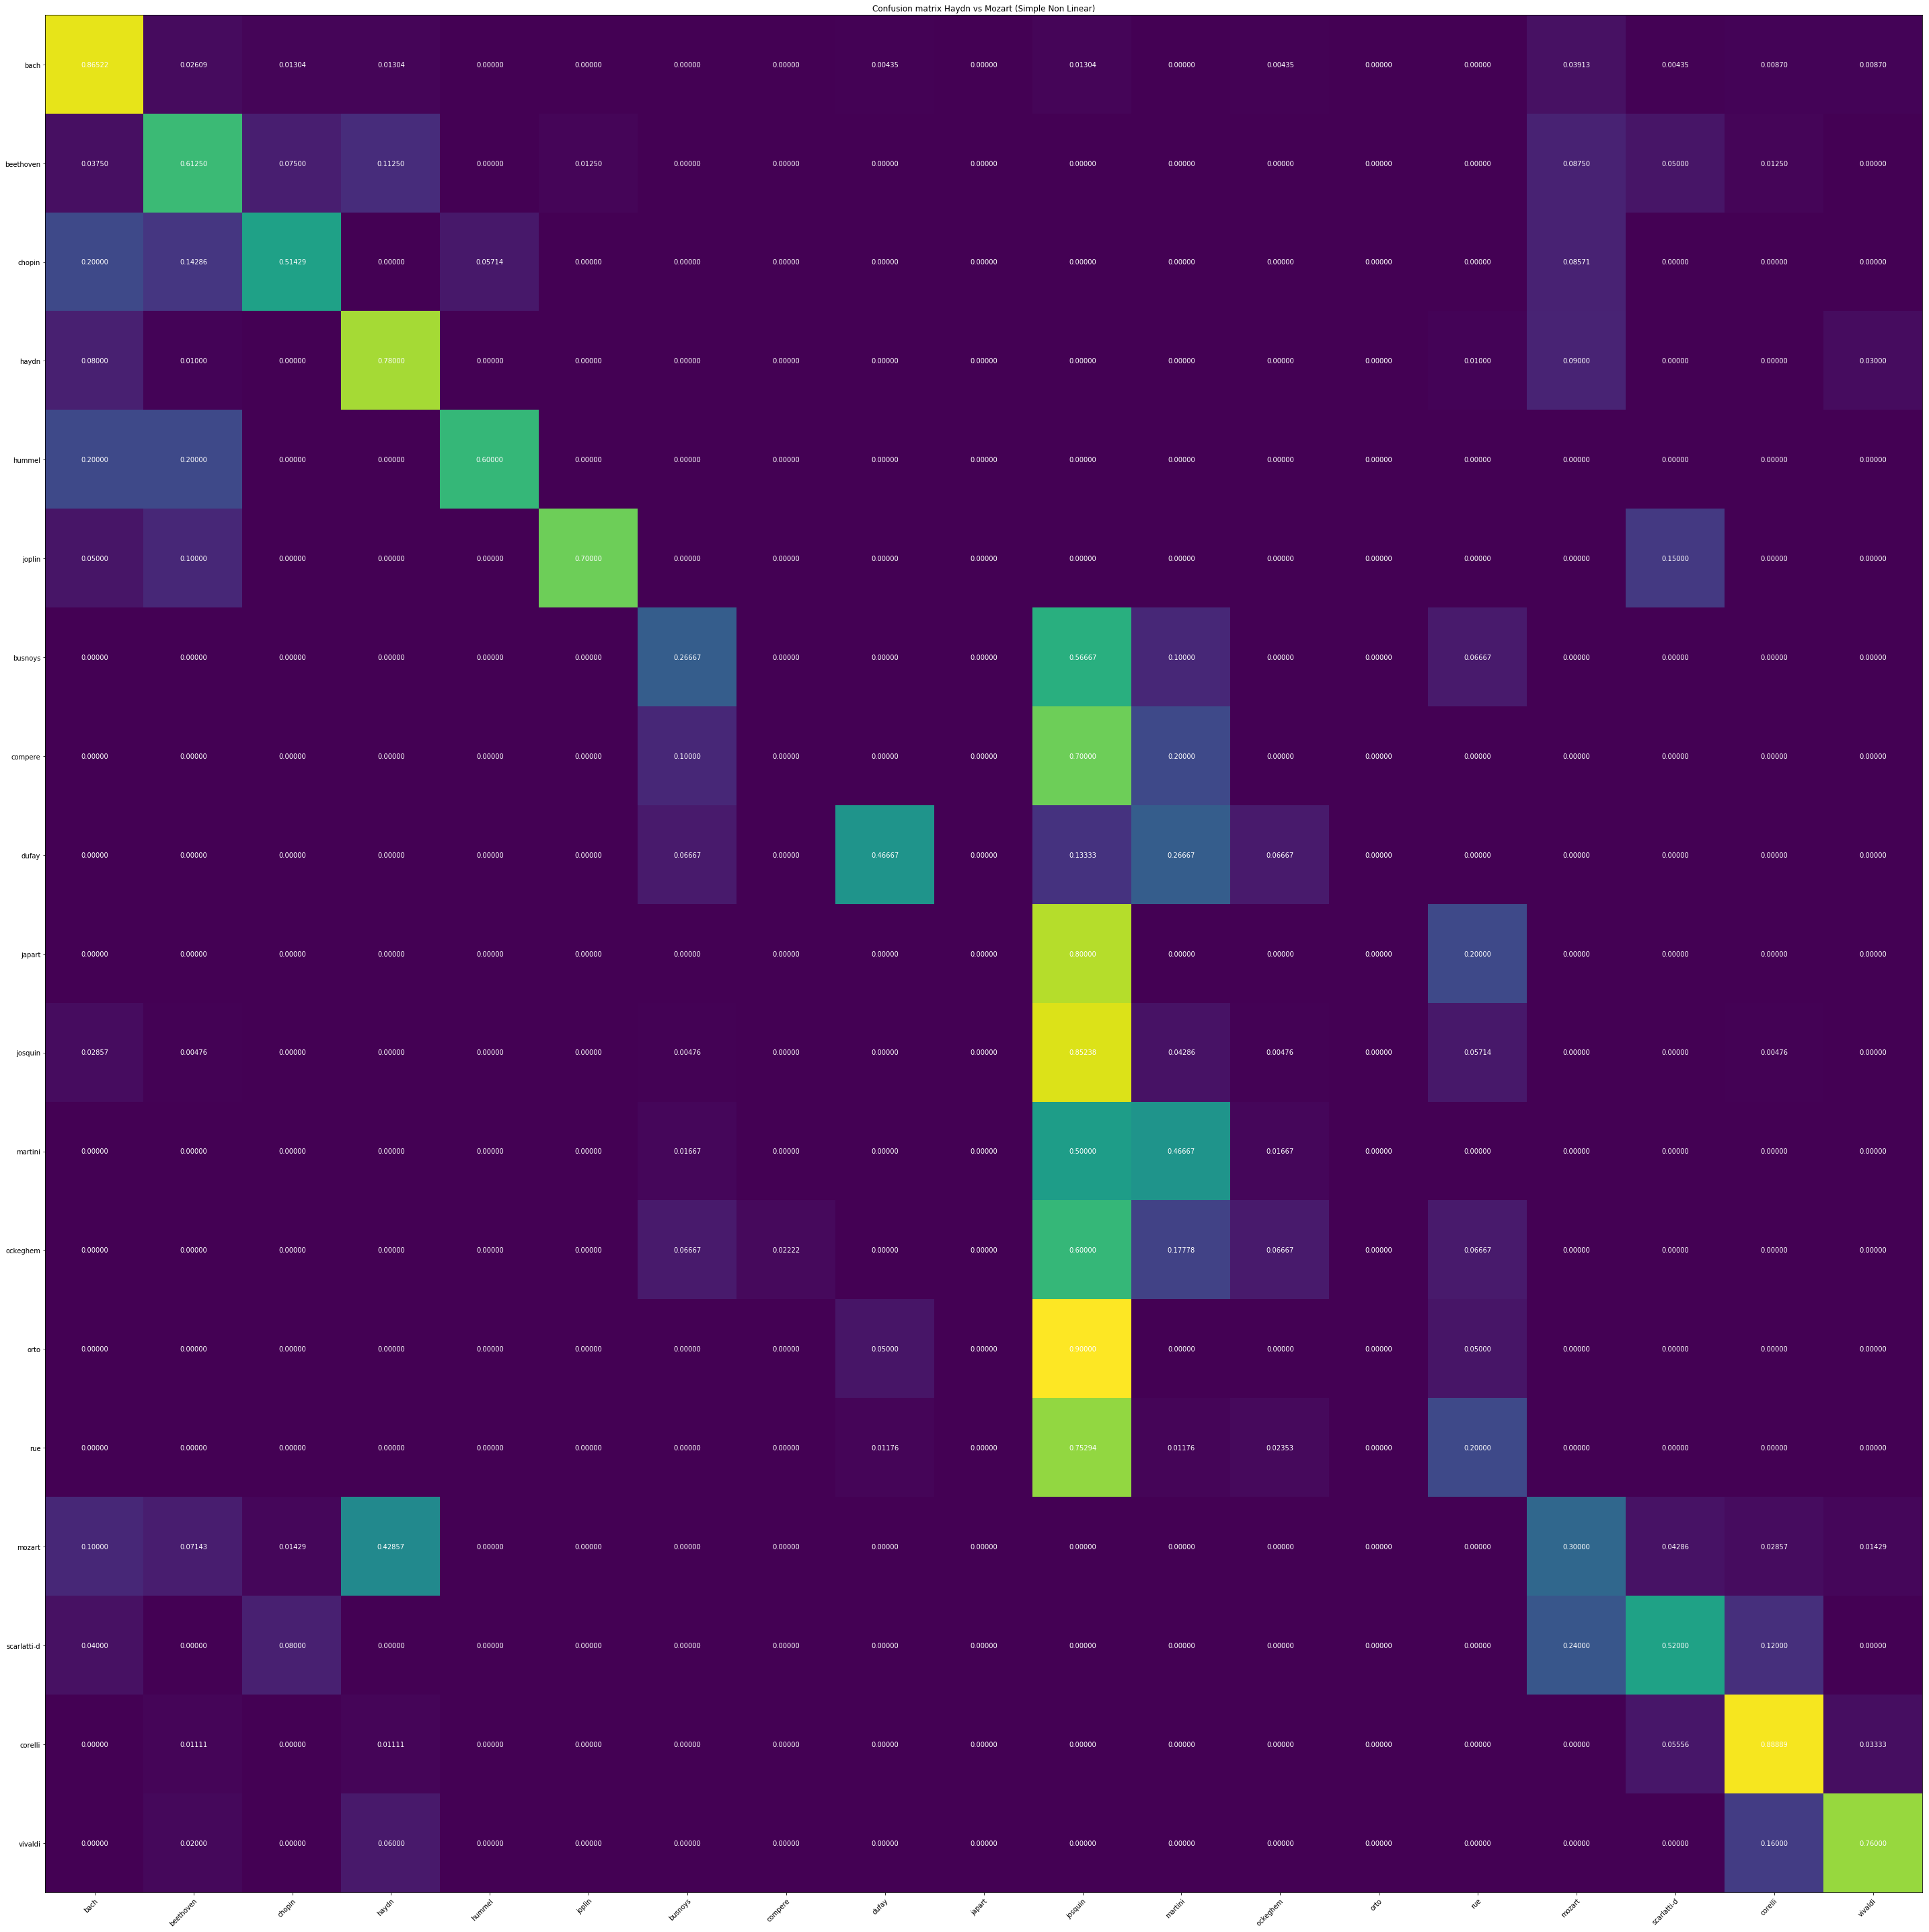

bach 41 / 46 = 0.8913043478260869
beethoven 10 / 16 = 0.625
busnoys 2 / 6 = 0.3333333333333333
chopin 7 / 7 = 1.0
compere 0 / 2 = 0.0
corelli 16 / 18 = 0.8888888888888888
dufay 3 / 3 = 1.0
haydn 16 / 20 = 0.8
hummel 0 / 2 = 0.0
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 32 / 42 = 0.7619047619047619
martini 5 / 12 = 0.4166666666666667
mozart 7 / 14 = 0.5
ockeghem 1 / 9 = 0.1111111111111111
orto 0 / 4 = 0.0
rue 4 / 17 = 0.23529411764705882
scarlatti-d 2 / 5 = 0.4
vivaldi 6 / 10 = 0.6
156 239 0.6527196652719666
---------------------------------------------
---------------------------------------------
Fold 5
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 19]) (1482)
w_t torch.Size([55, 19]) (1045)
bias torch.Size([19]) (19)
Initialized graph with 2546 parameters
Initiating optimizer, 32 iterations/epoch.
acc_tr	acc_t

65.00   61.92   4032    1.54    1.77    3.77    1.59    
65.00   63.60   4064    1.44    1.77    3.63    1.56    
64.00   62.34   4096    1.70    1.77    3.69    1.62    
65.00   61.92   4128    1.57    1.77    3.53    1.51    
64.50   62.76   4160    1.56    1.76    3.57    1.37    
64.50   63.18   4192    1.51    1.76    3.78    1.61    
65.00   63.18   4224    1.48    1.76    3.62    1.48    
65.50   62.34   4256    1.56    1.76    3.50    1.57    
65.50   61.92   4288    1.68    1.75    3.82    1.56    
65.00   62.34   4320    1.67    1.75    3.62    1.43    
65.50   61.92   4352    1.39    1.75    3.82    1.60    
66.00   61.92   4384    1.51    1.75    3.59    1.47    
64.50   62.34   4416    1.39    1.75    3.66    1.54    
65.00   61.92   4448    1.63    1.75    3.75    1.57    
65.00   62.34   4480    1.46    1.74    3.71    1.54    
65.50   61.92   4512    1.49    1.74    3.74    1.51    
66.00   61.92   4544    1.47    1.74    3.64    1.52    
67.00   62.34   4576    1.44   

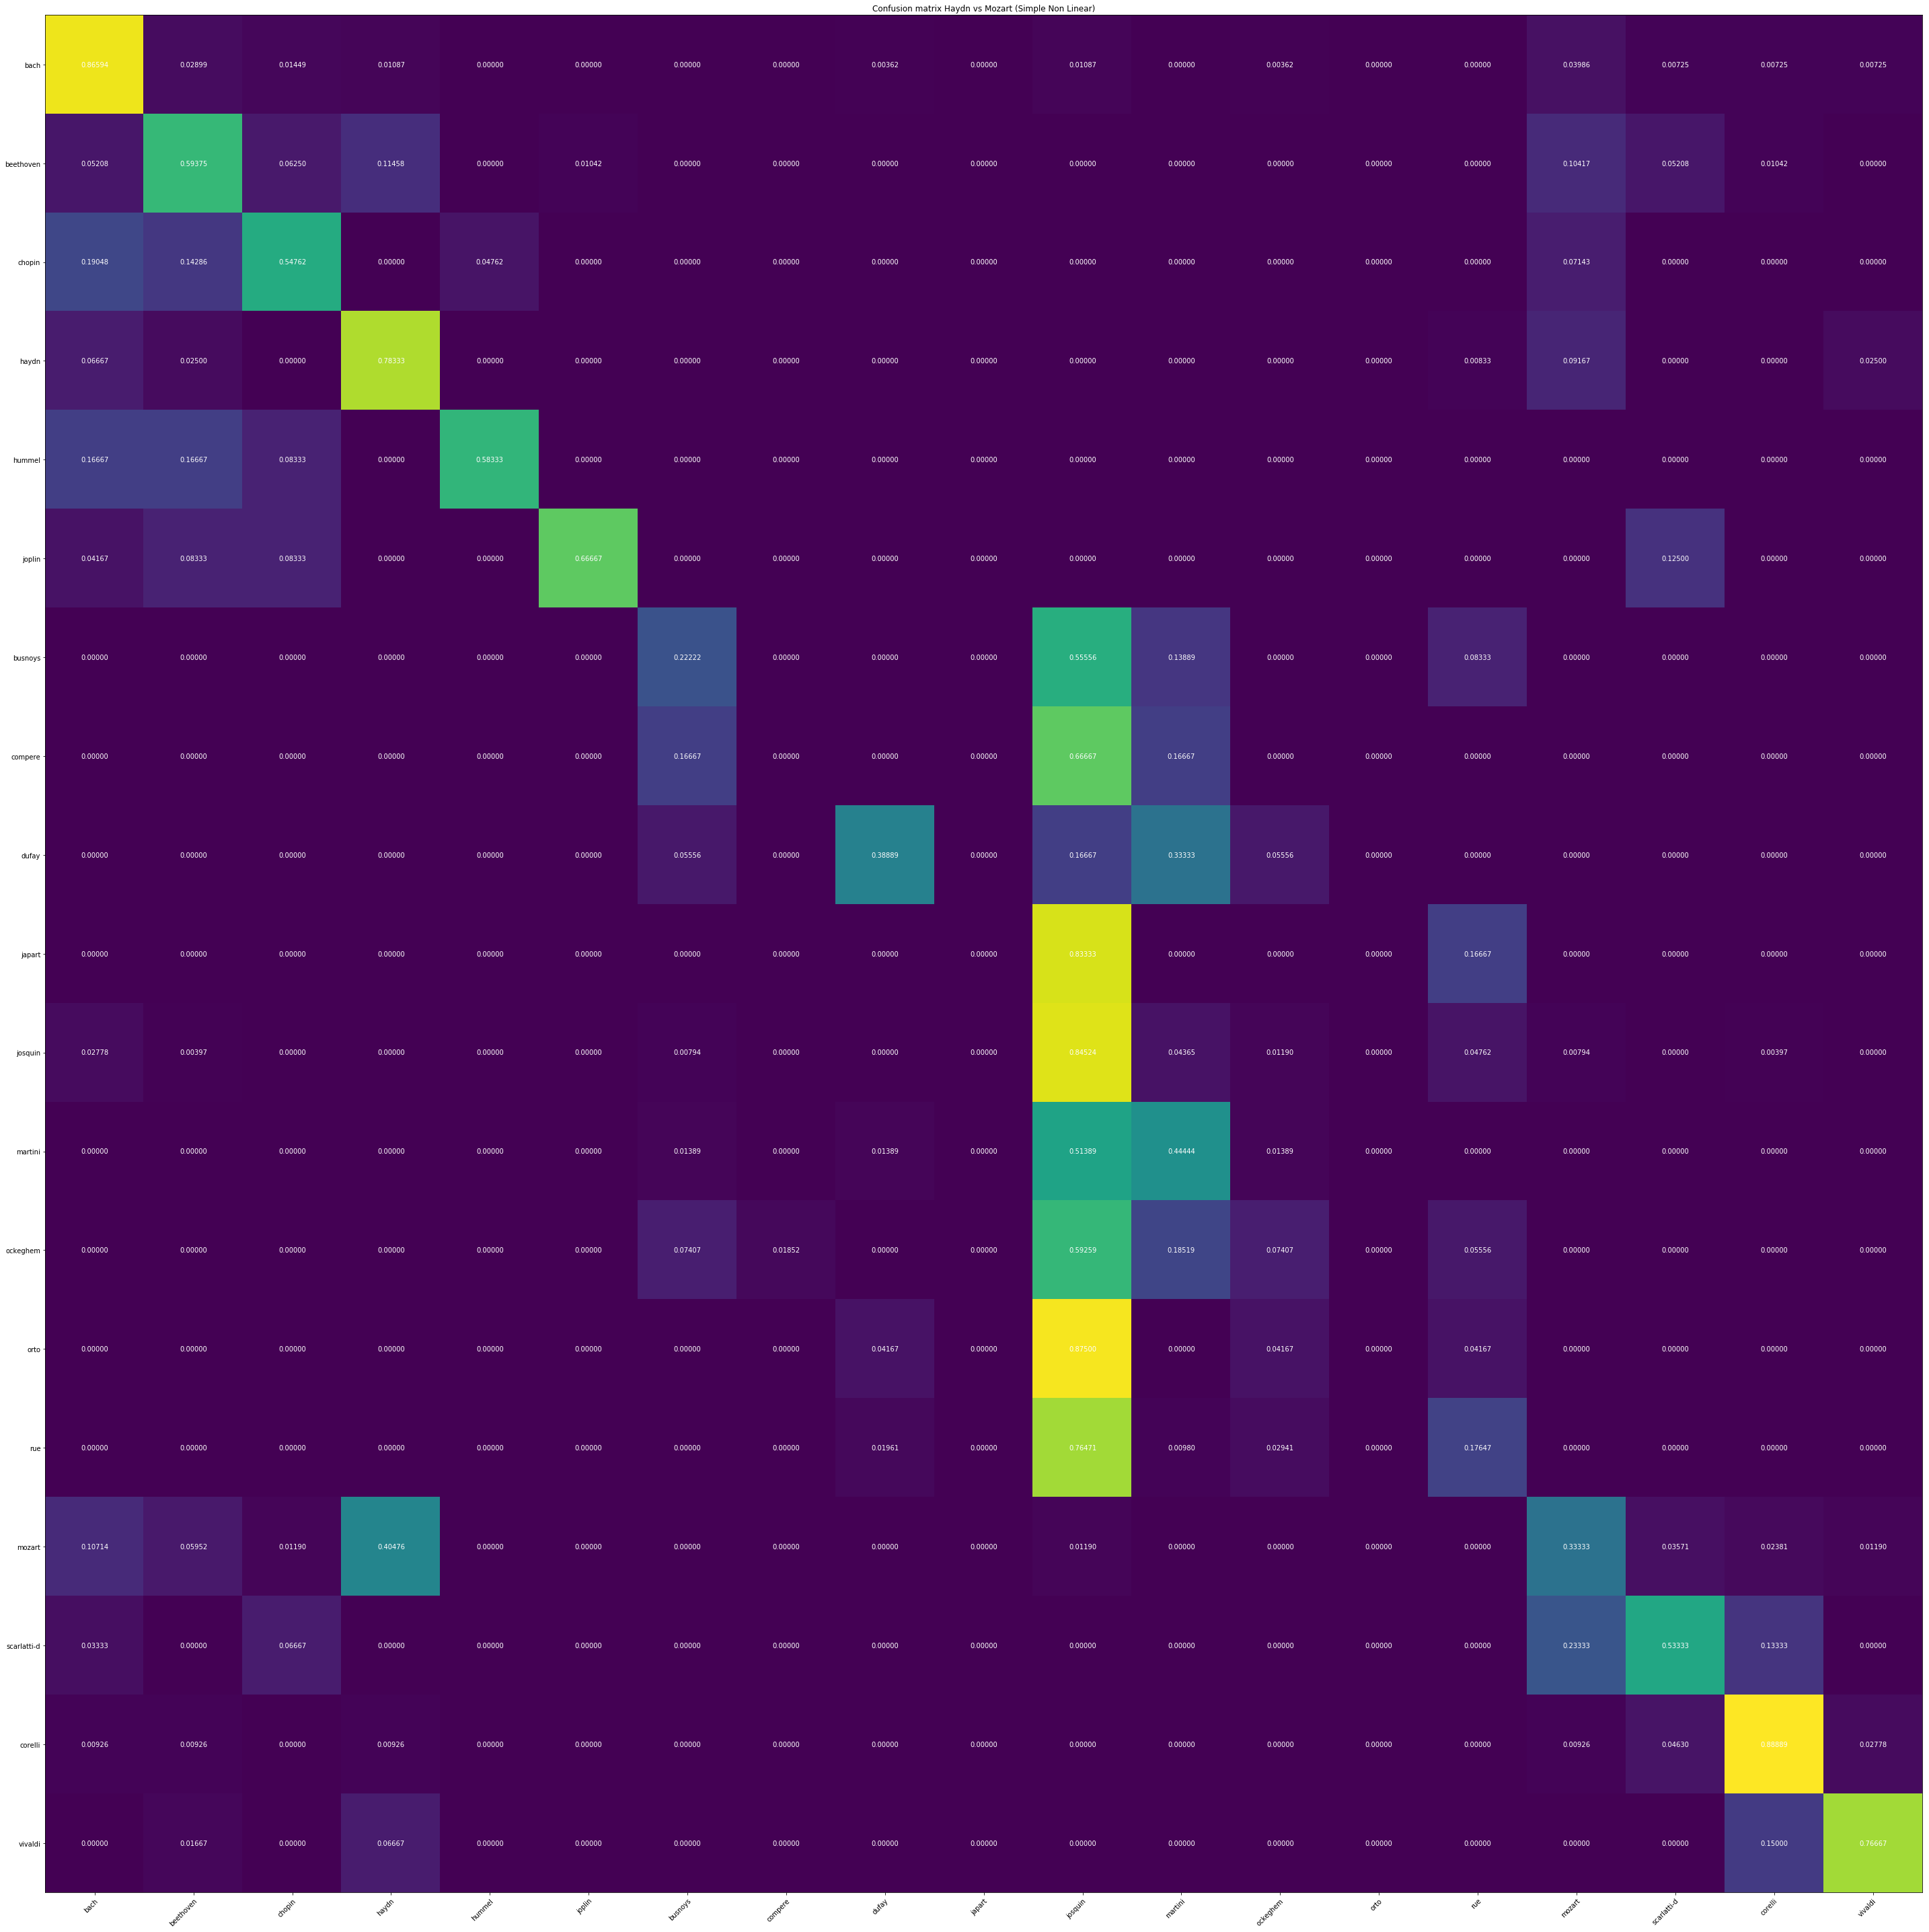

bach 40 / 46 = 0.8695652173913043
beethoven 8 / 16 = 0.5
busnoys 0 / 6 = 0.0
chopin 5 / 7 = 0.7142857142857143
compere 0 / 2 = 0.0
corelli 16 / 18 = 0.8888888888888888
dufay 0 / 3 = 0.0
haydn 16 / 20 = 0.8
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 2 / 4 = 0.5
josquin 34 / 42 = 0.8095238095238095
martini 4 / 12 = 0.3333333333333333
mozart 7 / 14 = 0.5
ockeghem 1 / 9 = 0.1111111111111111
orto 0 / 4 = 0.0
rue 1 / 17 = 0.058823529411764705
scarlatti-d 3 / 5 = 0.6
vivaldi 8 / 10 = 0.8
146 239 0.6108786610878661
---------------------------------------------
---------------------------------------------
Fold 6
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 19]) (1482)
w_t torch.Size([55, 19]) (1045)
bias torch.Size([19]) (19)
Initialized graph with 2546 parameters
Initiating optimizer, 32 iterations/epoch.
acc_tr	acc_ts	

67.50   65.27   4032    1.64    1.58    3.85    1.63    
67.00   65.69   4064    1.61    1.58    4.20    1.60    
67.50   64.85   4096    1.50    1.57    3.79    1.48    
68.00   64.44   4128    1.76    1.57    4.23    1.45    
67.00   65.69   4160    1.48    1.57    4.01    1.73    
67.00   65.27   4192    1.51    1.57    3.94    1.46    
67.00   64.85   4224    1.40    1.56    3.82    1.59    
67.00   65.27   4256    1.41    1.56    4.16    1.47    
67.00   65.27   4288    1.63    1.56    3.90    1.62    
67.00   64.85   4320    1.80    1.56    4.05    1.51    
67.50   64.85   4352    1.44    1.55    3.73    1.47    
67.50   65.27   4384    1.50    1.55    4.25    1.56    
67.50   65.27   4416    1.46    1.55    4.00    1.61    
66.50   64.85   4448    1.39    1.55    4.10    1.57    
67.00   65.69   4480    1.36    1.55    3.99    1.64    
67.00   64.85   4512    1.51    1.54    4.35    1.51    
67.50   65.69   4544    1.61    1.54    3.98    1.64    
67.00   64.85   4576    1.62   

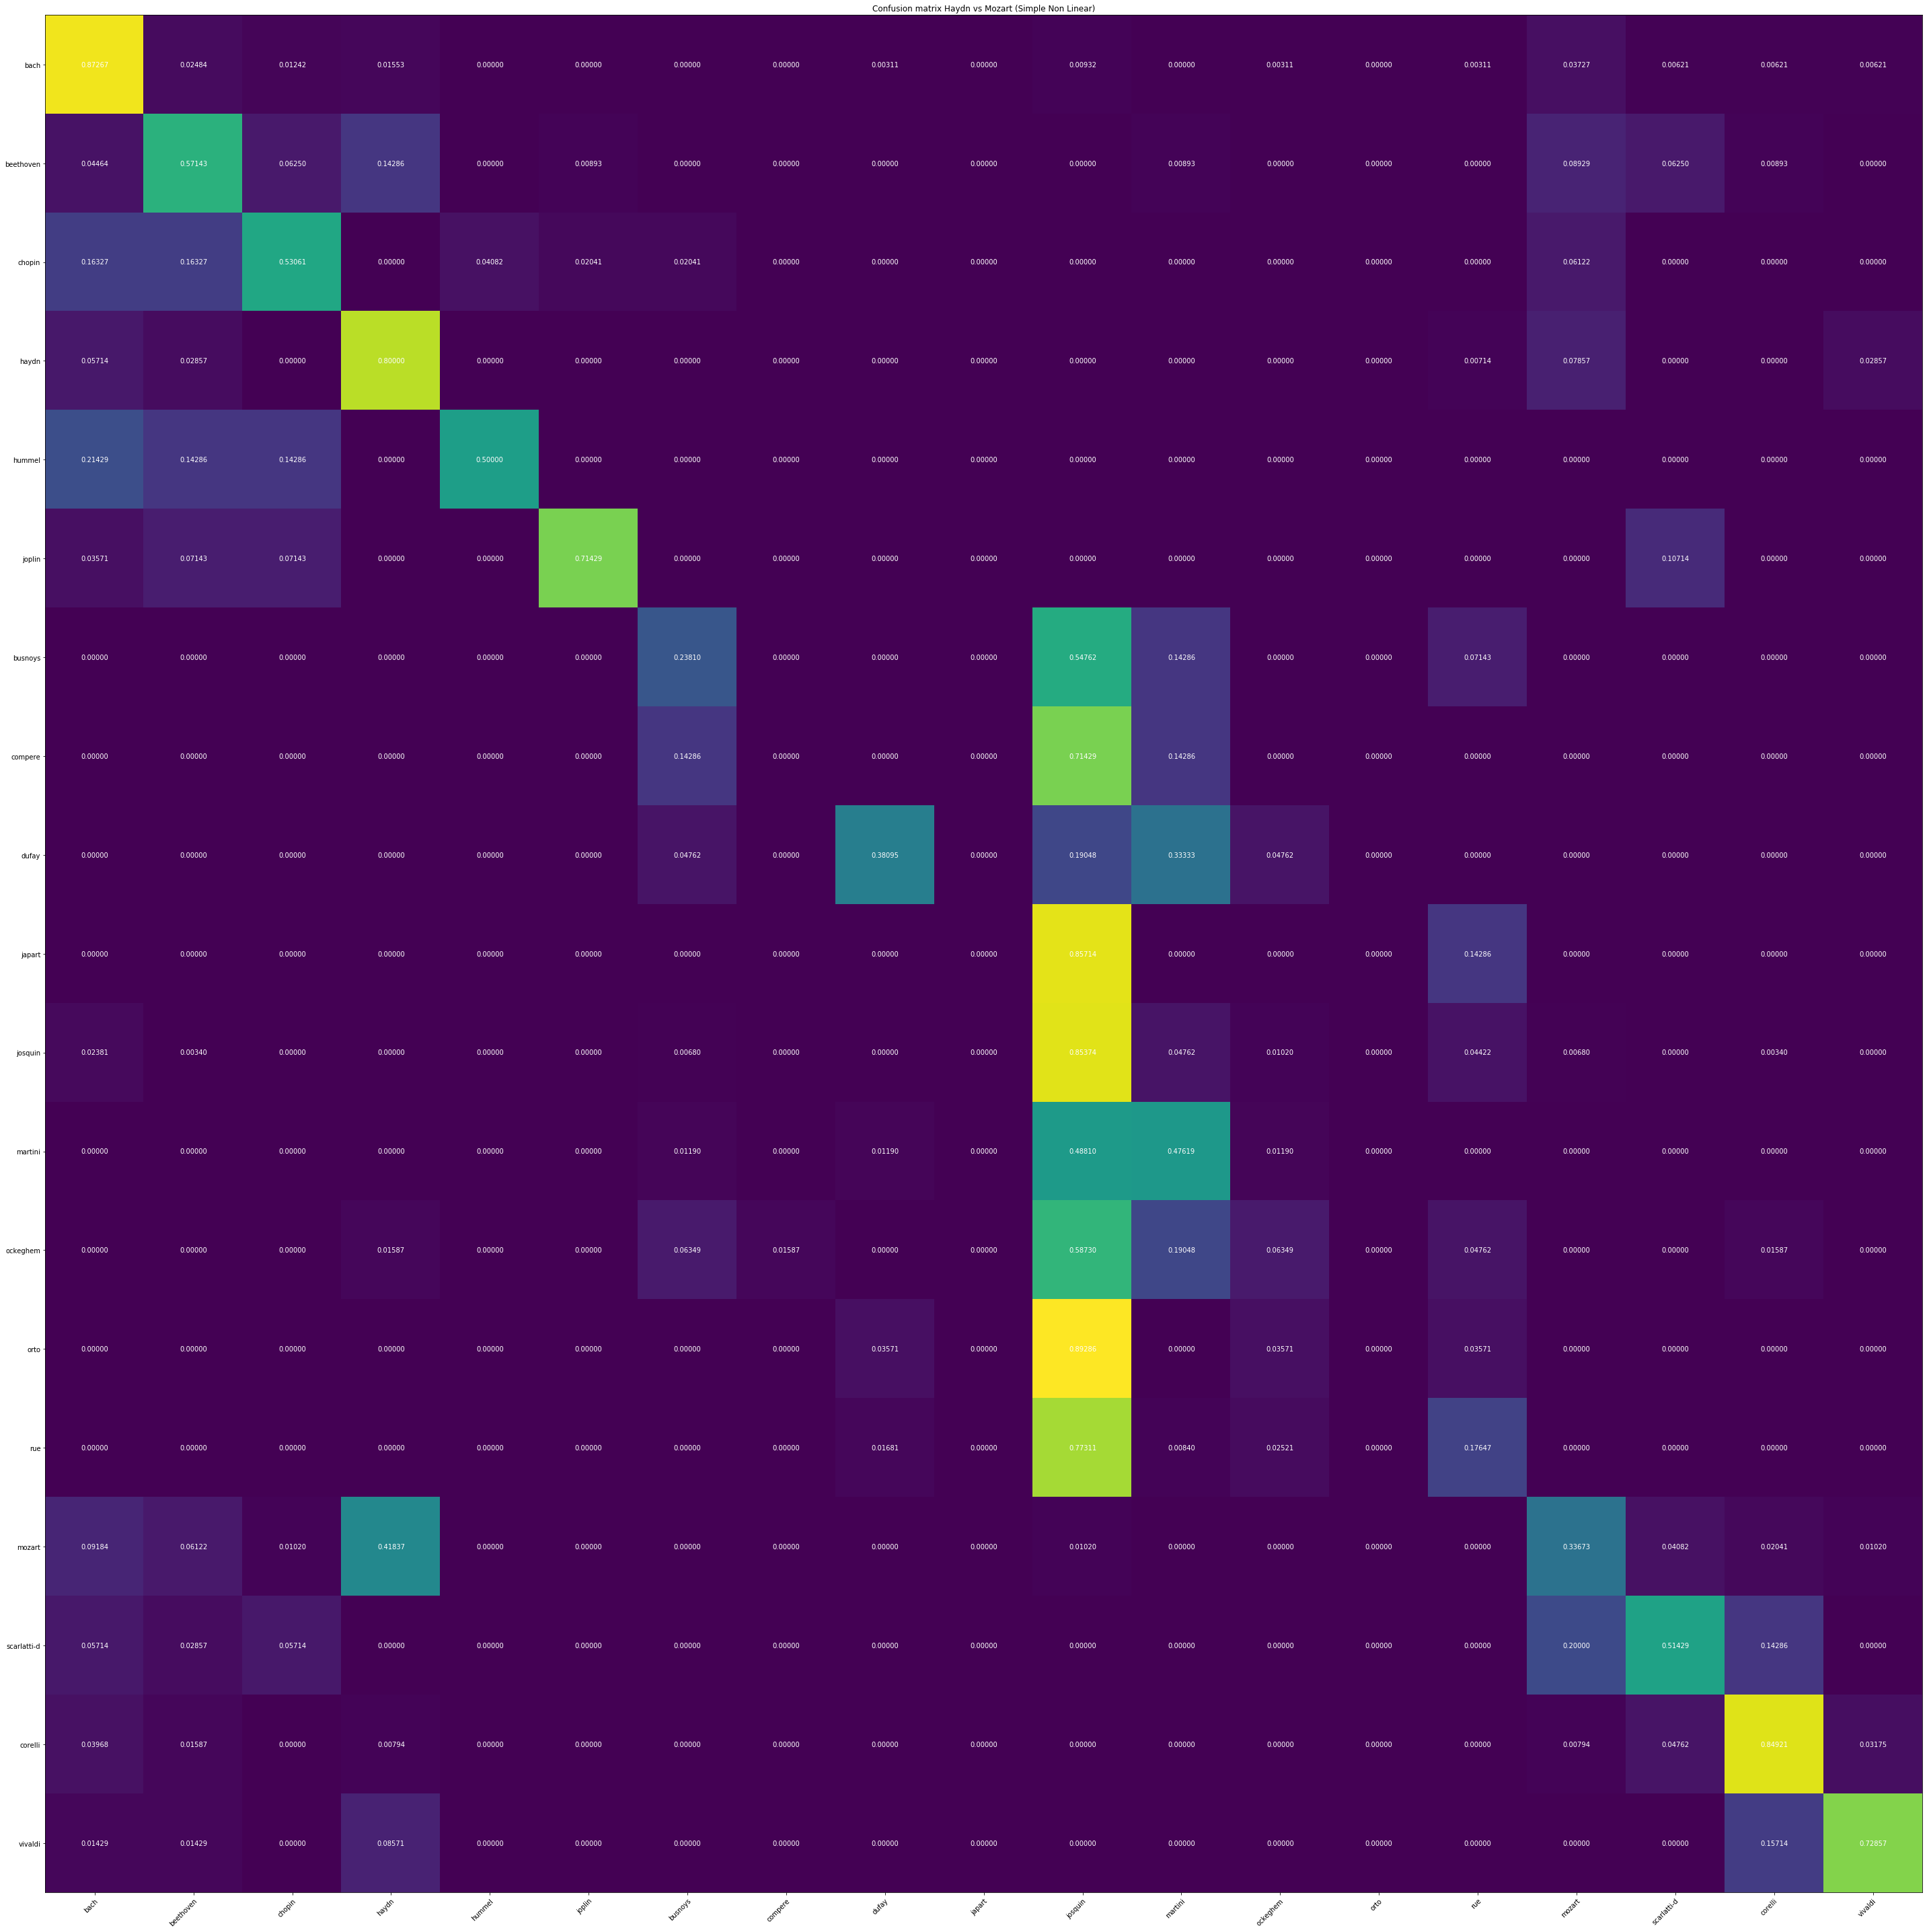

bach 42 / 46 = 0.9130434782608695
beethoven 7 / 16 = 0.4375
busnoys 2 / 6 = 0.3333333333333333
chopin 3 / 7 = 0.42857142857142855
compere 0 / 2 = 0.0
corelli 11 / 18 = 0.6111111111111112
dufay 1 / 3 = 0.3333333333333333
haydn 18 / 20 = 0.9
hummel 0 / 2 = 0.0
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 38 / 42 = 0.9047619047619048
martini 8 / 12 = 0.6666666666666666
mozart 5 / 14 = 0.35714285714285715
ockeghem 0 / 9 = 0.0
orto 0 / 4 = 0.0
rue 3 / 17 = 0.17647058823529413
scarlatti-d 2 / 5 = 0.4
vivaldi 5 / 10 = 0.5
149 239 0.6234309623430963
---------------------------------------------
---------------------------------------------
Fold 7
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 19]) (1482)
w_t torch.Size([55, 19]) (1045)
bias torch.Size([19]) (19)
Initialized graph with 2546 parameters
Initiating optimizer, 3

62.50   71.55   4032    1.58    1.52    3.85    1.74    
63.50   71.55   4064    1.64    1.52    4.39    1.89    
62.50   71.13   4096    1.62    1.52    3.77    1.71    
62.50   71.55   4128    1.70    1.51    4.22    1.89    
63.00   71.55   4160    1.70    1.51    3.80    1.82    
63.50   71.55   4192    1.80    1.51    3.87    1.82    
63.00   71.55   4224    1.51    1.50    4.38    1.87    
63.50   71.55   4256    1.50    1.50    3.97    1.71    
63.00   71.55   4288    1.62    1.50    4.12    1.84    
63.50   71.55   4320    1.57    1.50    3.90    1.73    
63.00   71.13   4352    1.53    1.49    4.25    1.74    
63.00   71.13   4384    1.79    1.49    4.01    1.70    
62.50   71.55   4416    1.71    1.49    4.01    1.55    
63.00   72.38   4448    1.66    1.49    3.97    1.61    
63.00   71.55   4480    1.48    1.49    4.09    1.48    
63.50   71.97   4512    1.47    1.48    4.01    1.65    
63.00   71.55   4544    1.64    1.48    4.36    1.47    
63.50   72.38   4576    1.59   

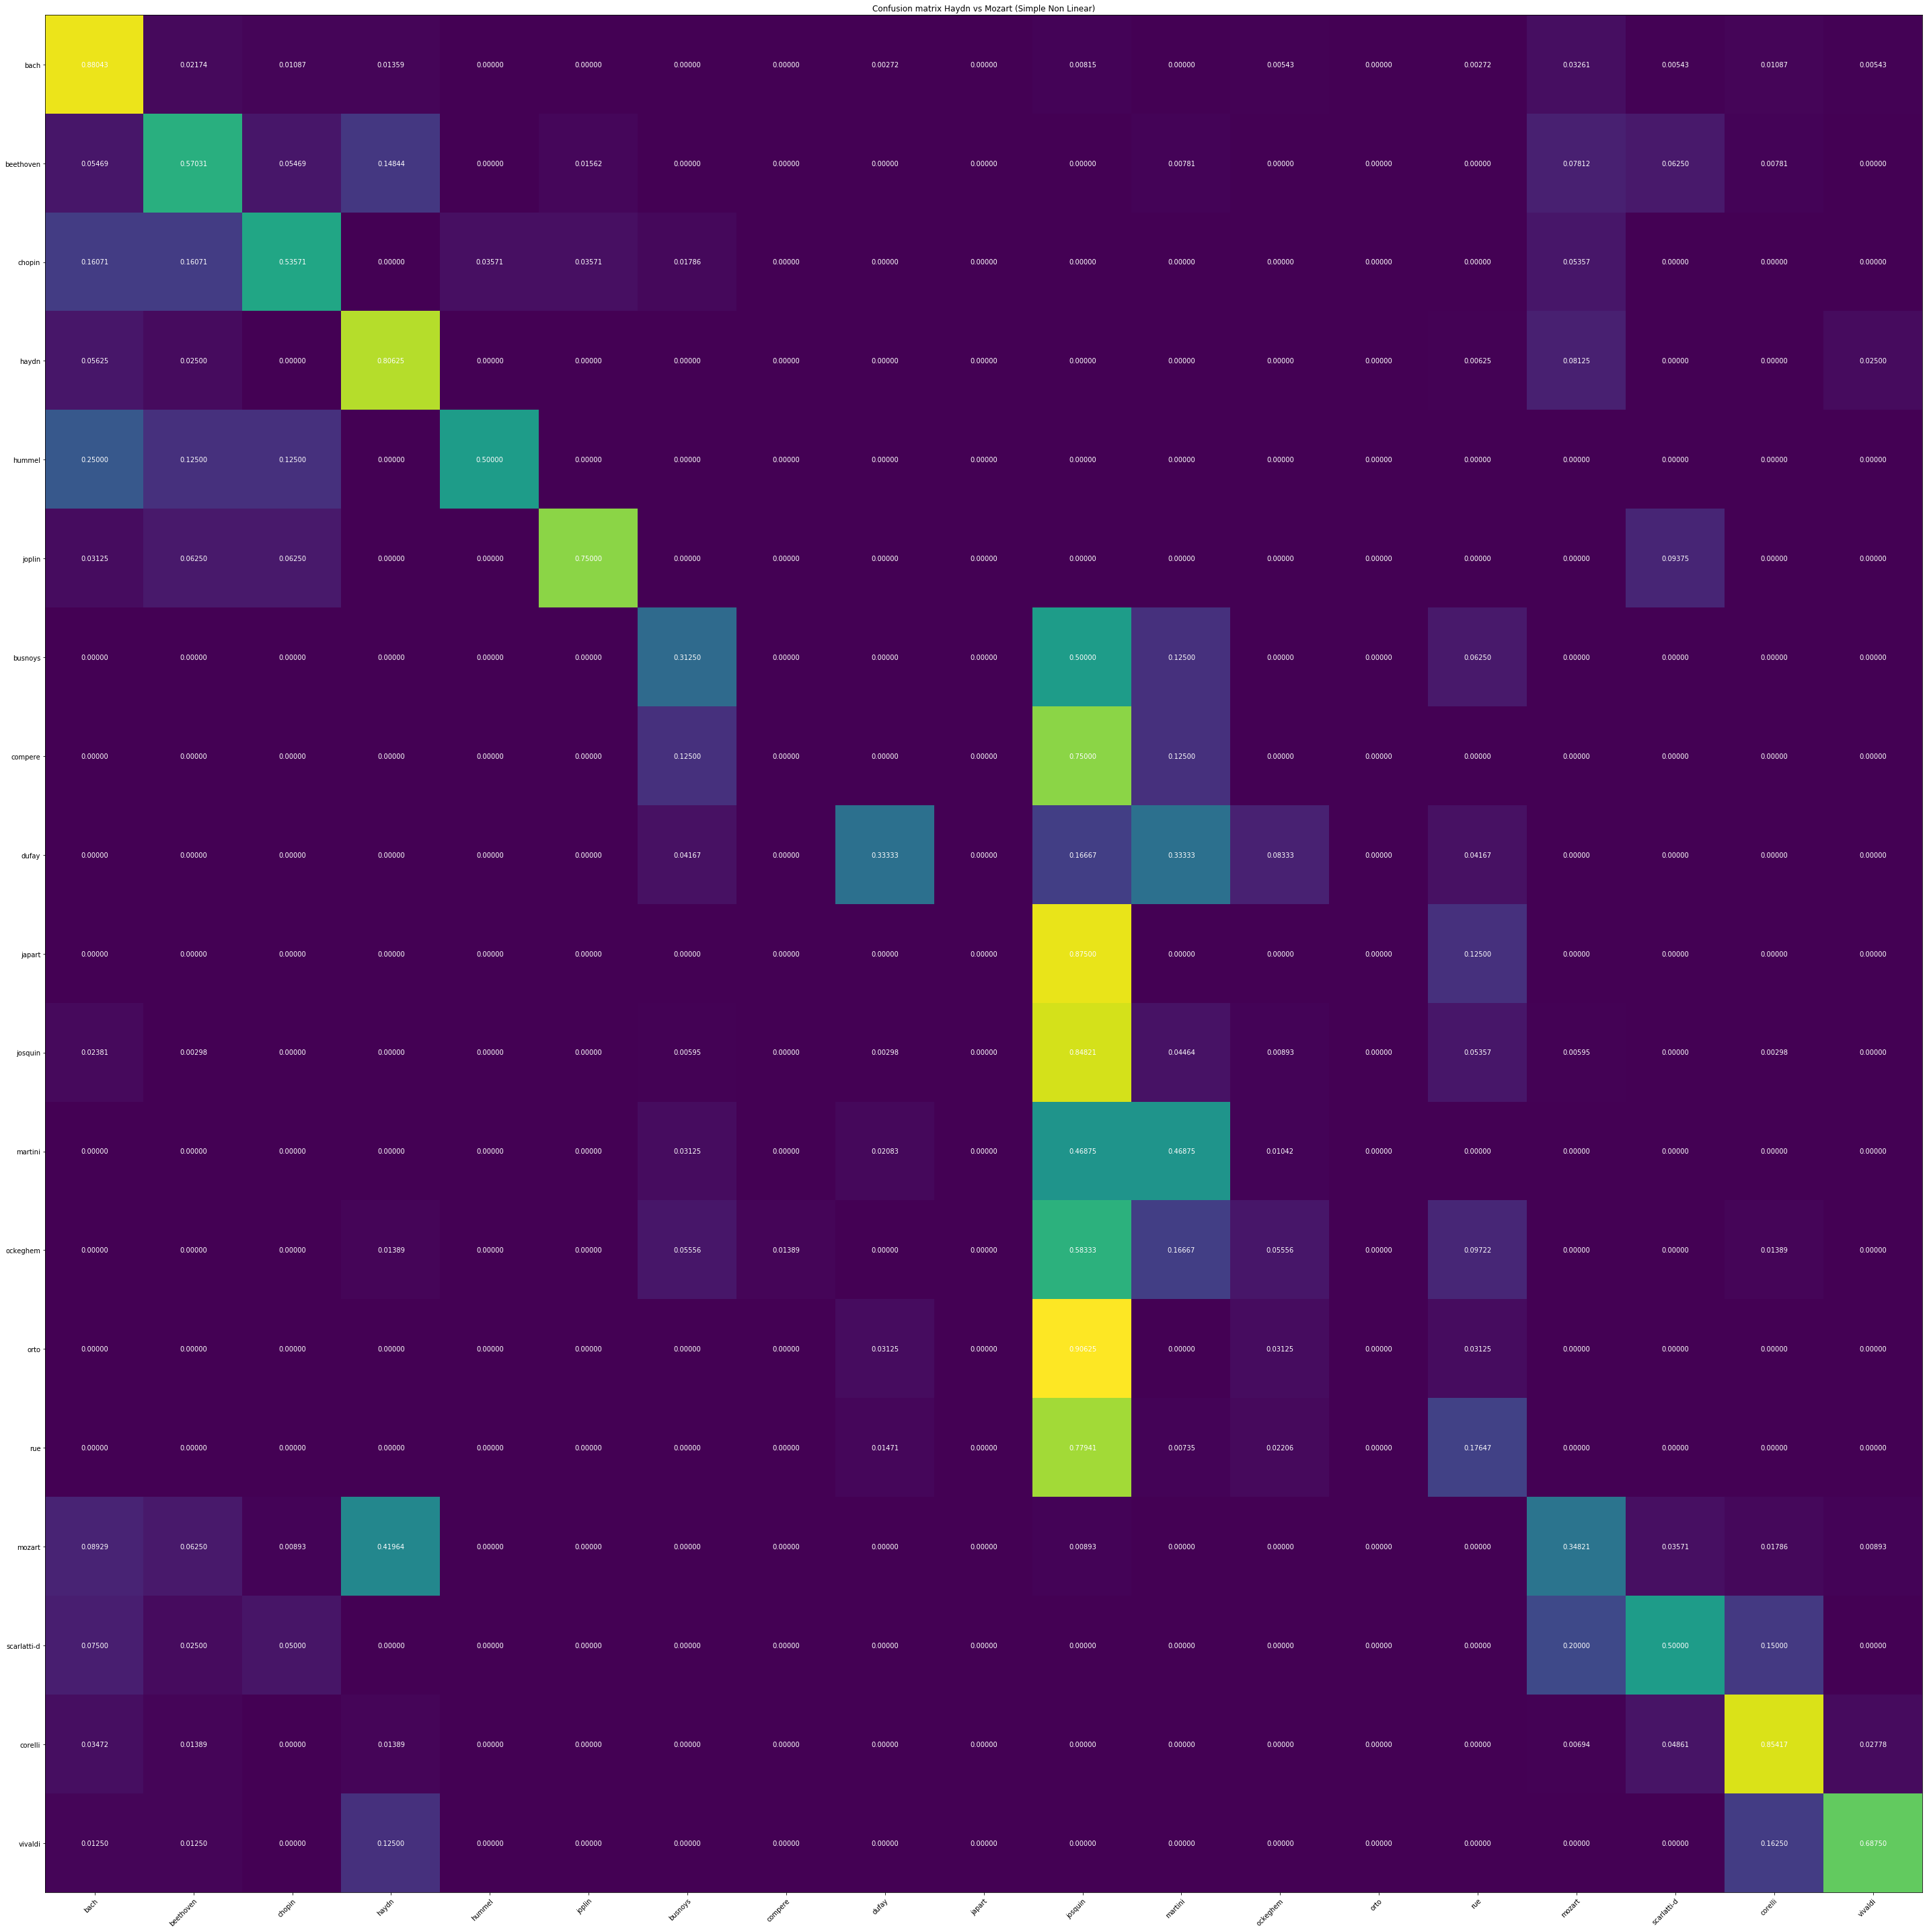

bach 43 / 46 = 0.9347826086956522
beethoven 9 / 16 = 0.5625
busnoys 5 / 6 = 0.8333333333333334
chopin 4 / 7 = 0.5714285714285714
compere 0 / 2 = 0.0
corelli 16 / 18 = 0.8888888888888888
dufay 0 / 3 = 0.0
haydn 17 / 20 = 0.85
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 34 / 42 = 0.8095238095238095
martini 5 / 12 = 0.4166666666666667
mozart 6 / 14 = 0.42857142857142855
ockeghem 0 / 9 = 0.0
orto 0 / 4 = 0.0
rue 3 / 17 = 0.17647058823529413
scarlatti-d 2 / 5 = 0.4
vivaldi 4 / 10 = 0.4
153 239 0.6401673640167364
---------------------------------------------
---------------------------------------------
Fold 8
len validation_ids 400
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 19]) (1482)
w_t torch.Size([55, 19]) (1045)
bias torch.Size([19]) (19)
Initialized graph with 2546 parameters
Initiating optimizer, 30 iterations/ep

65.50   56.23   3780    1.46    2.01    5.28    2.20    
65.50   55.68   3810    1.31    2.01    3.87    2.02    
65.50   55.96   3840    1.54    2.01    4.37    1.67    
65.50   56.23   3870    1.69    2.01    4.79    2.14    
65.50   56.23   3900    1.39    2.00    4.44    1.64    
65.50   56.23   3930    1.53    2.00    4.09    1.94    
65.50   55.96   3960    1.55    2.00    4.03    1.72    
65.50   56.51   3990    1.50    2.00    4.64    1.94    
65.50   56.23   4020    1.37    1.99    4.38    1.97    
65.50   56.51   4050    1.47    1.99    3.79    1.58    
66.00   56.23   4080    1.54    1.99    5.17    2.09    
66.00   55.96   4110    1.22    1.99    3.78    1.46    
66.00   55.96   4140    1.44    1.99    4.86    1.63    
65.50   56.51   4170    1.39    1.98    3.92    1.89    
66.00   55.96   4200    1.41    1.98    5.10    1.89    
66.00   56.23   4230    1.39    1.98    4.09    2.05    
66.00   56.23   4260    1.44    1.98    4.39    2.02    
66.00   56.51   4290    1.35   

67.00   62.05   8100    1.21    1.88    4.24    1.80    
67.00   61.22   8130    1.09    1.88    3.82    1.56    
67.00   62.05   8160    1.14    1.88    4.19    2.14    
68.50   61.77   8190    1.42    1.88    4.10    1.73    
67.50   61.50   8220    1.15    1.88    3.48    1.75    
67.50   61.22   8250    1.25    1.88    3.54    1.54    
67.00   61.77   8280    1.20    1.88    4.03    1.89    
68.00   62.33   8310    1.28    1.88    4.36    1.63    
67.50   62.60   8340    1.17    1.87    4.66    1.94    
67.50   62.05   8370    1.14    1.88    4.19    1.93    
67.50   61.50   8400    1.25    1.88    5.30    1.98    
67.50   60.94   8430    1.23    1.88    4.27    2.32    
67.50   62.05   8460    1.12    1.88    4.12    1.82    
67.50   62.33   8490    1.11    1.88    4.96    2.46    
67.50   62.05   8520    1.28    1.88    4.28    1.79    
68.00   61.77   8550    1.26    1.88    4.15    1.79    
67.50   61.77   8580    1.10    1.88    4.16    1.96    
68.00   61.77   8610    1.12   

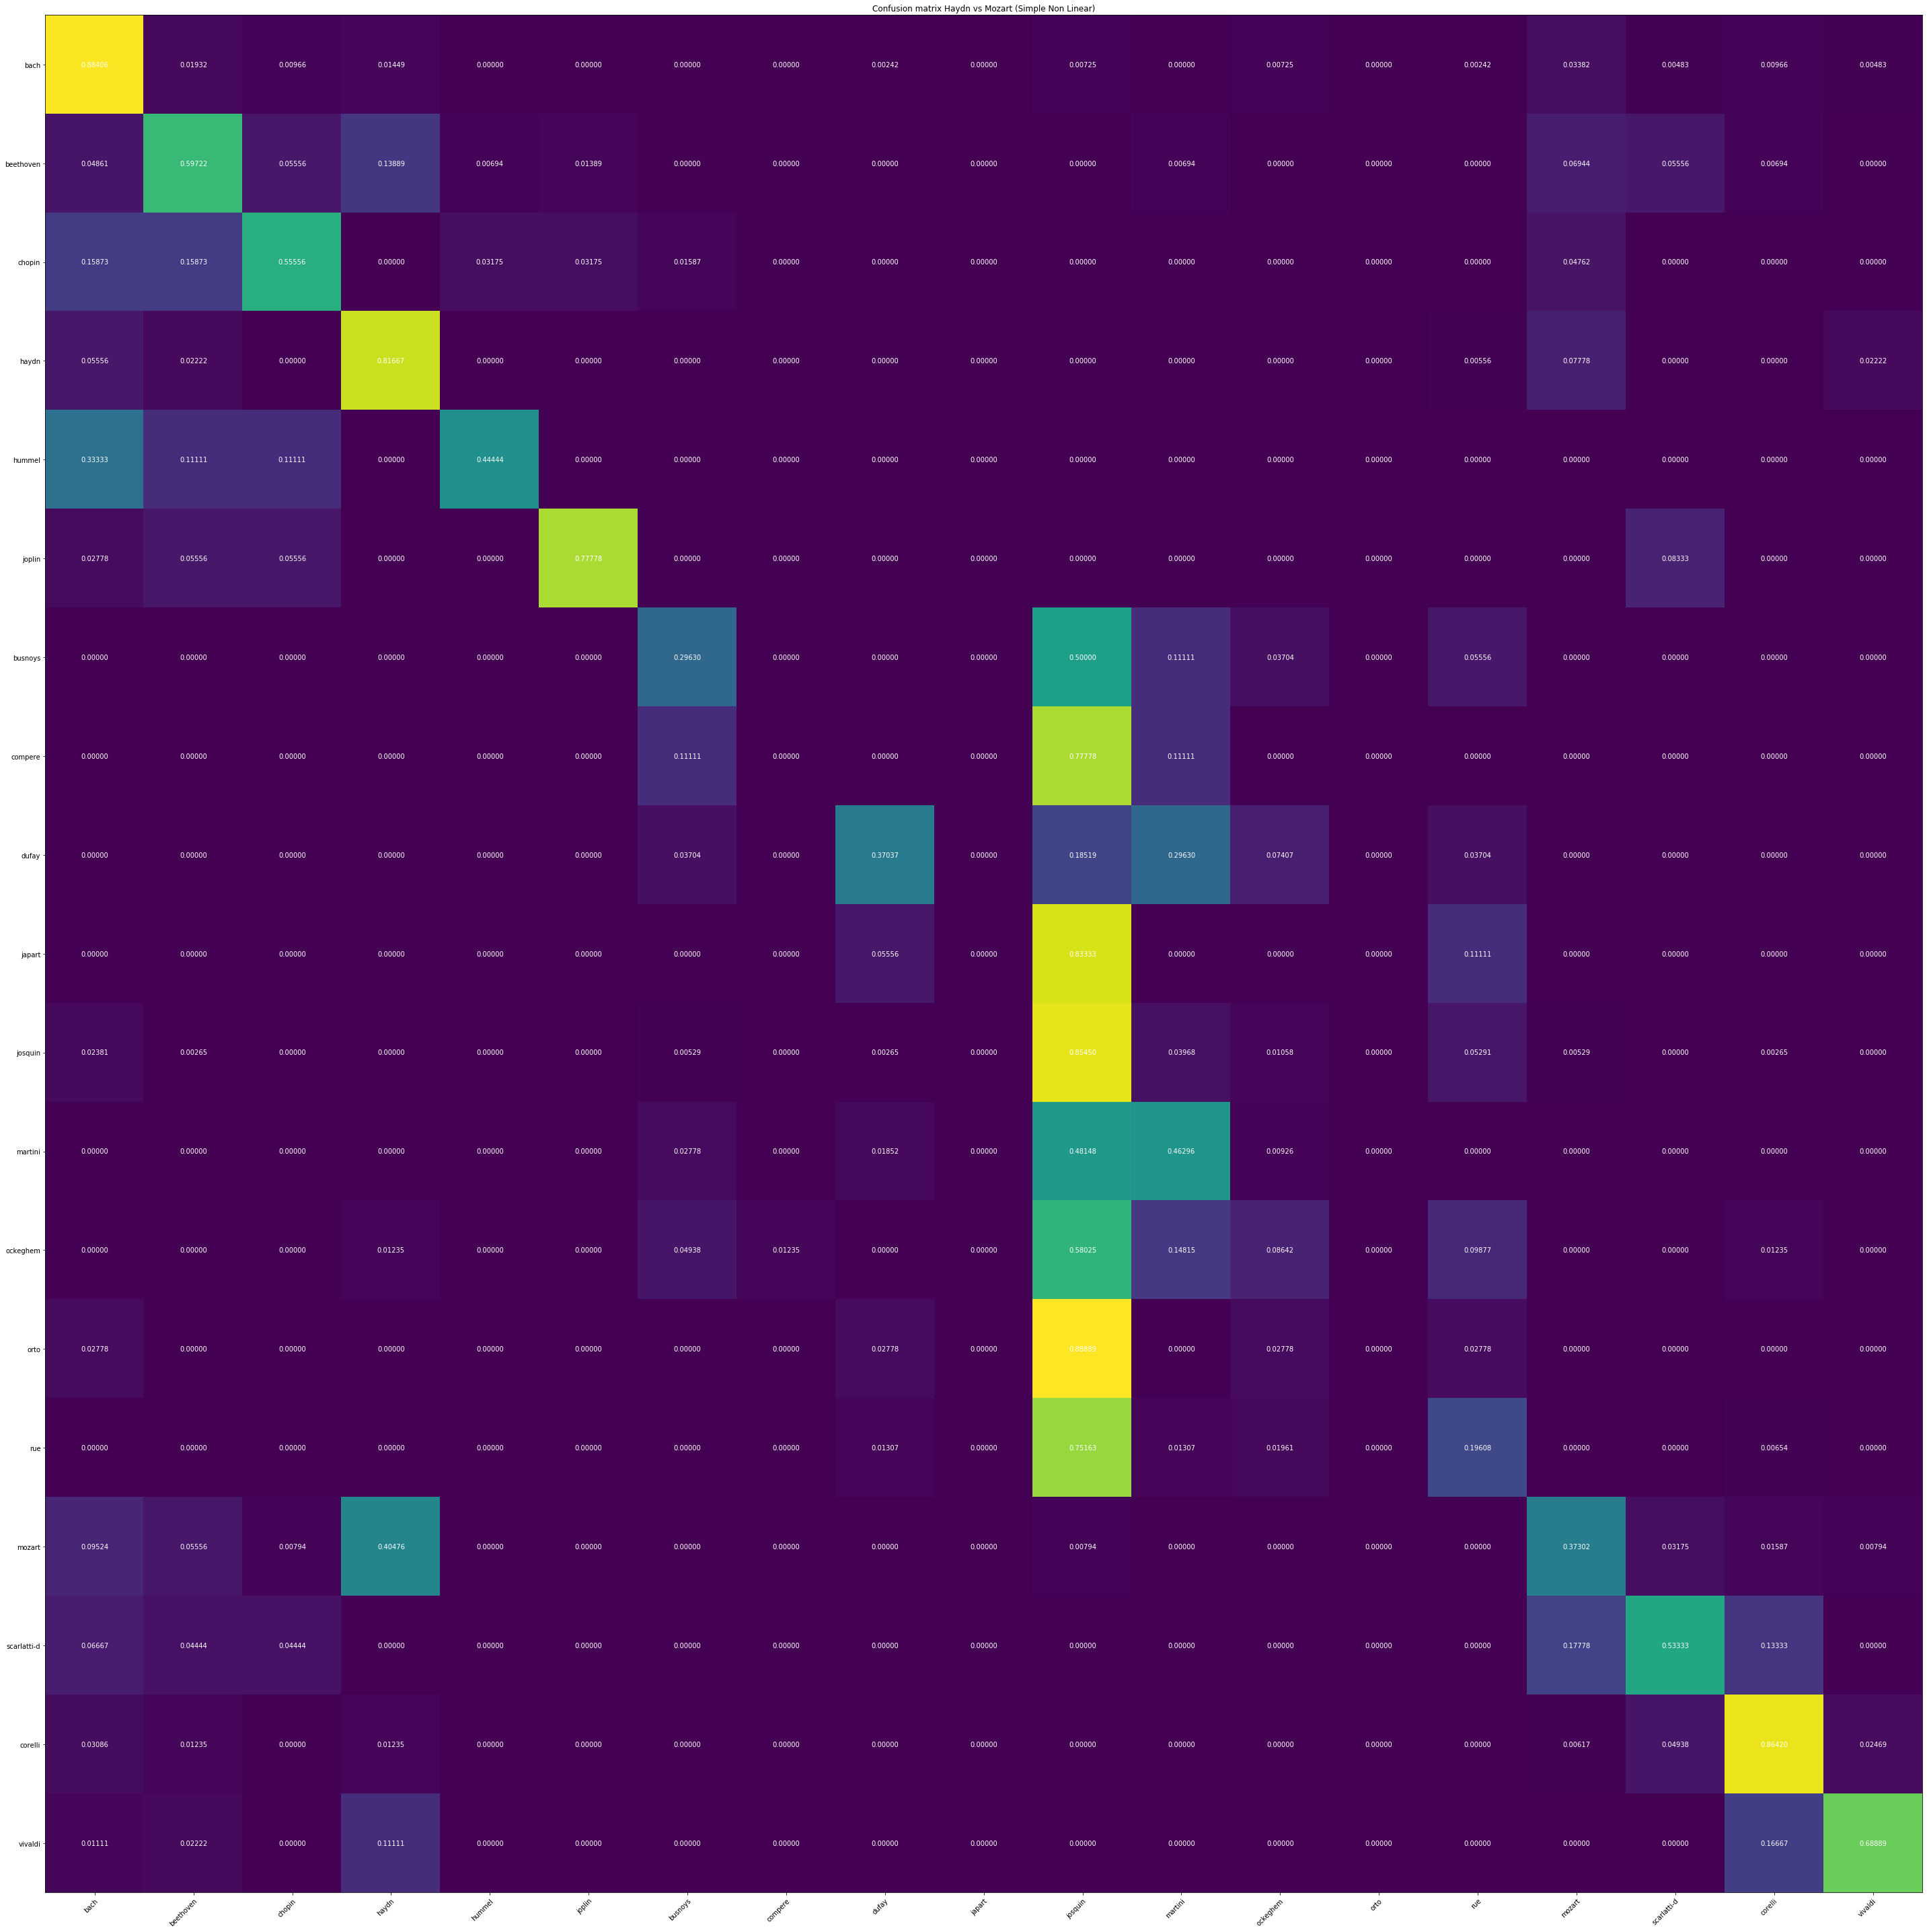

bach 42 / 46 = 0.9130434782608695
beethoven 13 / 16 = 0.8125
busnoys 1 / 6 = 0.16666666666666666
chopin 5 / 7 = 0.7142857142857143
compere 0 / 2 = 0.0
corelli 17 / 18 = 0.9444444444444444
dufay 2 / 3 = 0.6666666666666666
haydn 18 / 20 = 0.9
hummel 0 / 2 = 0.0
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 38 / 42 = 0.9047619047619048
martini 5 / 12 = 0.4166666666666667
mozart 8 / 14 = 0.5714285714285714
ockeghem 3 / 9 = 0.3333333333333333
orto 0 / 4 = 0.0
rue 6 / 17 = 0.35294117647058826
scarlatti-d 4 / 5 = 0.8
vivaldi 7 / 10 = 0.7
173 239 0.7238493723849372
---------------------------------------------
---------------------------------------------
Fold 9
len validation_ids 246
len test_ids 400
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 19]) (1482)
w_t torch.Size([55, 19]) (1045)
bias torch.Size([19]) (19)
Initialized graph with 2546 parameters
Initiati

64.00   62.34   3750    1.48    1.67    4.31    1.66    
64.50   62.34   3780    1.63    1.67    4.59    2.41    
64.00   62.34   3810    1.60    1.67    4.39    1.72    
64.00   63.60   3840    1.49    1.67    4.43    2.33    
64.00   62.76   3870    1.49    1.67    3.90    1.85    
64.50   62.76   3900    1.61    1.66    4.62    2.32    
65.00   62.76   3930    1.47    1.66    4.19    1.91    
64.00   62.76   3960    1.72    1.66    3.85    1.63    
64.00   62.76   3990    1.50    1.65    4.28    1.92    
64.50   62.76   4020    1.71    1.65    4.66    1.74    
63.50   63.18   4050    1.51    1.65    4.52    1.79    
64.00   62.76   4080    1.56    1.65    3.81    1.73    
65.00   62.76   4110    1.56    1.65    5.23    2.03    
64.00   63.60   4140    1.46    1.65    3.68    1.70    
64.00   62.34   4170    1.43    1.64    4.31    1.47    
65.00   63.60   4200    1.42    1.64    3.94    1.81    
65.00   62.76   4230    1.65    1.64    4.88    1.47    
64.50   63.18   4260    1.31   

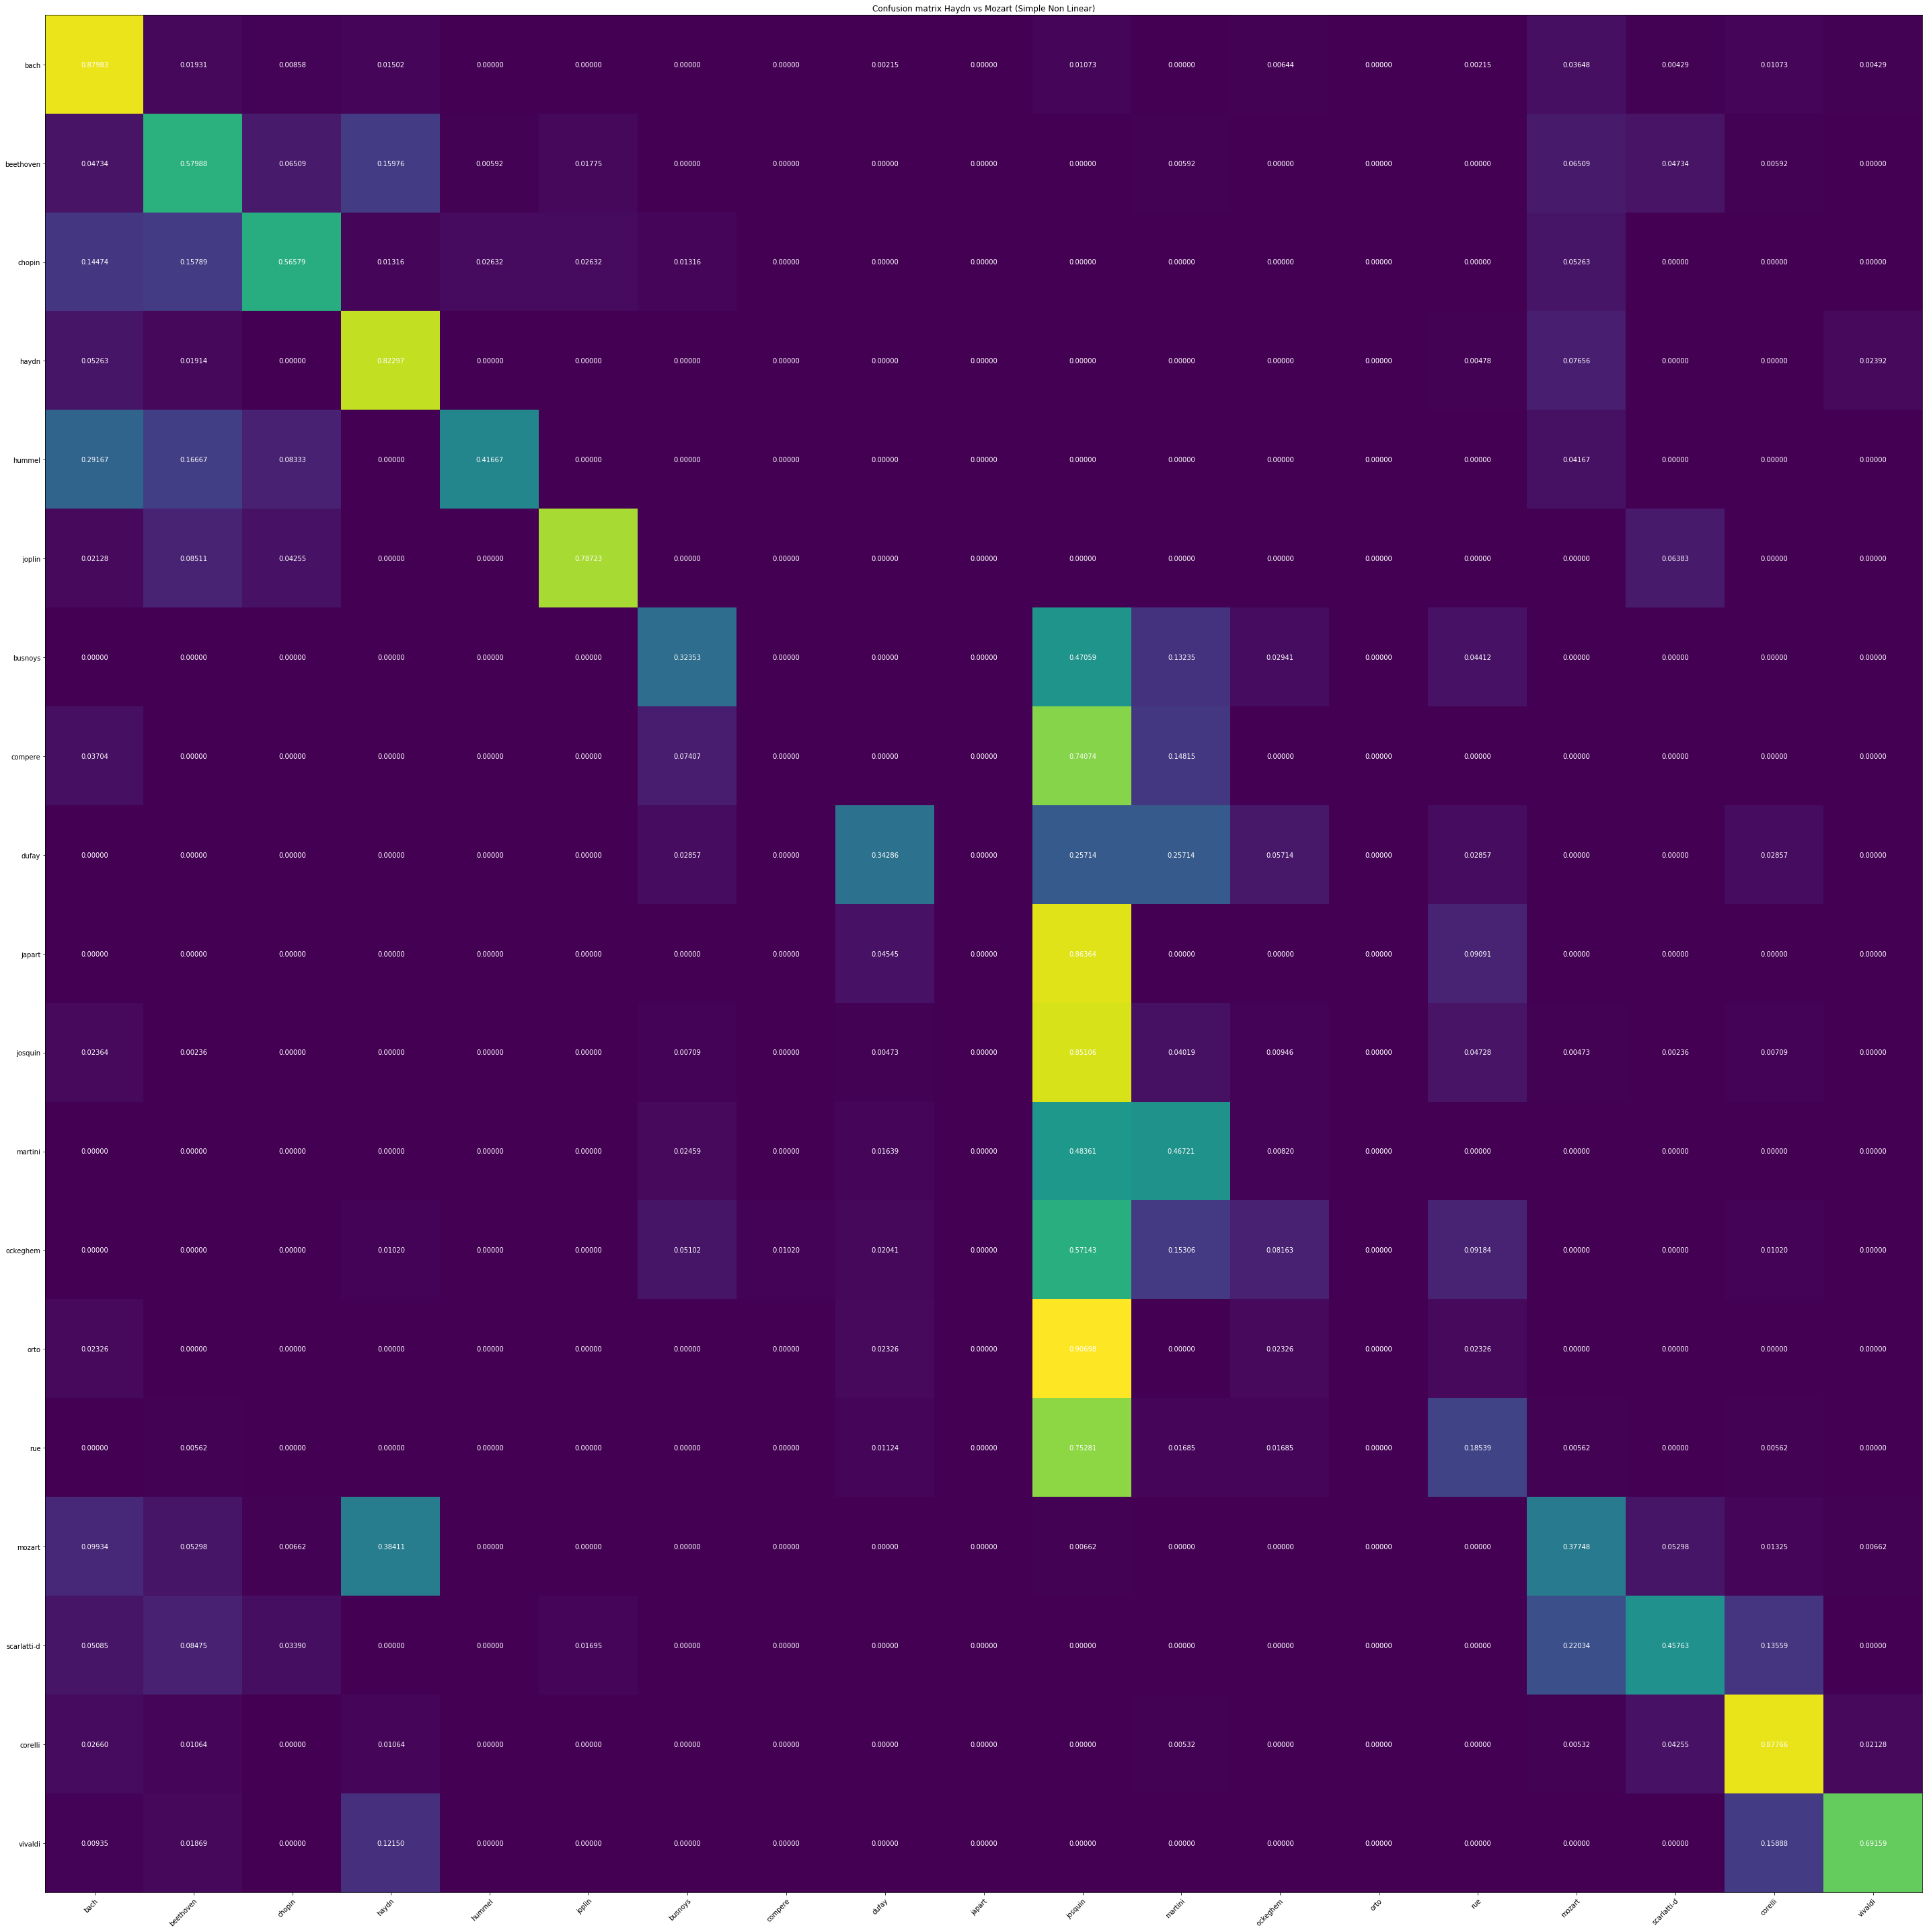

bach 44 / 52 = 0.8461538461538461
beethoven 12 / 25 = 0.48
busnoys 6 / 14 = 0.42857142857142855
chopin 8 / 13 = 0.6153846153846154
compere 0 / 9 = 0.0
corelli 25 / 26 = 0.9615384615384616
dufay 2 / 8 = 0.25
haydn 25 / 29 = 0.8620689655172413
hummel 2 / 6 = 0.3333333333333333
japart 0 / 4 = 0.0
joplin 9 / 11 = 0.8181818181818182
josquin 37 / 45 = 0.8222222222222222
martini 7 / 14 = 0.5
mozart 10 / 25 = 0.4
ockeghem 1 / 17 = 0.058823529411764705
orto 0 / 7 = 0.0
rue 3 / 25 = 0.12
scarlatti-d 3 / 14 = 0.21428571428571427
vivaldi 12 / 17 = 0.7058823529411765
206 361 0.5706371191135734
Final real overall test accuracy: 0.6309713375796179 (1585/2512)
  bach: 0.8798283261802575 (410/466)
  beethoven: 0.5798816568047337 (98/169)
  chopin: 0.5657894736842105 (43/76)
  haydn: 0.8229665071770335 (172/209)
  hummel: 0.4166666666666667 (10/24)
  joplin: 0.7872340425531915 (37/47)
  busnoys: 0.3235294117647059 (22/68)
  compere: 0.0 (0/27)
  dufay: 0.34285714285714286 (12/35)
  japart: 0.0 (0/22)
  

In [5]:
validator.run(context, checkpoint_dir=checkpoint_dir)

In [1]:
(265 + 184 + 181 + 181 + 184 + 184 + 183 + 175 + 188 + 170)/ (361 + 239 + 239 + 239 + 239 + 239 + 239 + 239 + 239 + 239)

0.7543789808917197